<a href="https://colab.research.google.com/github/NzungizeL/My_Personal_Project/blob/master/scRNA_seq_68kPBMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Single-cell-gene-expression (scRNA-seq) of Peripheral Blood Mononuclear Cell**

**Main：** visualization possibilities such as Scatter plots （UMAP and t-SNE)，using known marker genes to identify clusters and differentially expressed genes.

*   scRNA-seq technology have resulted in a wealth of studies aiming to identify transcriptomic cell types in various biological systems.
*   Single-cell RNA sequencing (scRNA-seq) is a powerful tool to study heterogeneity and dynamic changes in cell populations

Dataset used [Fresh 68k PBMCs (Donor A)](https://support.10xgenomics.com/single-cell-gene-expression/datasets/1.1.0/fresh_68k_pbmc_donor_a)

In [ ]:
#!pip install scanpy

In [3]:
import scanpy as sc
import pandas as pd
from matplotlib import rcParams

**Perform dimensionality reduction**

*  Perform dimensionality reduction with **UMAP**
* Perform dimensionality reduction with **tSNE**

Dimensional reduction techniques such as** UMAP and tSNE** are used to visualize scRNA-seq data in two or three dimensions in order for cells to be clustered in biologically meaningful ways. 



In [ ]:
sc.set_figure_params(dpi=100, color_map = 'viridis_r')
sc.settings.verbosity = 1
sc.logging.print_versions()

In [5]:
#Load pbmc dataset
pbmc = sc.datasets.pbmc68k_reduced()

In [6]:
pbmc

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

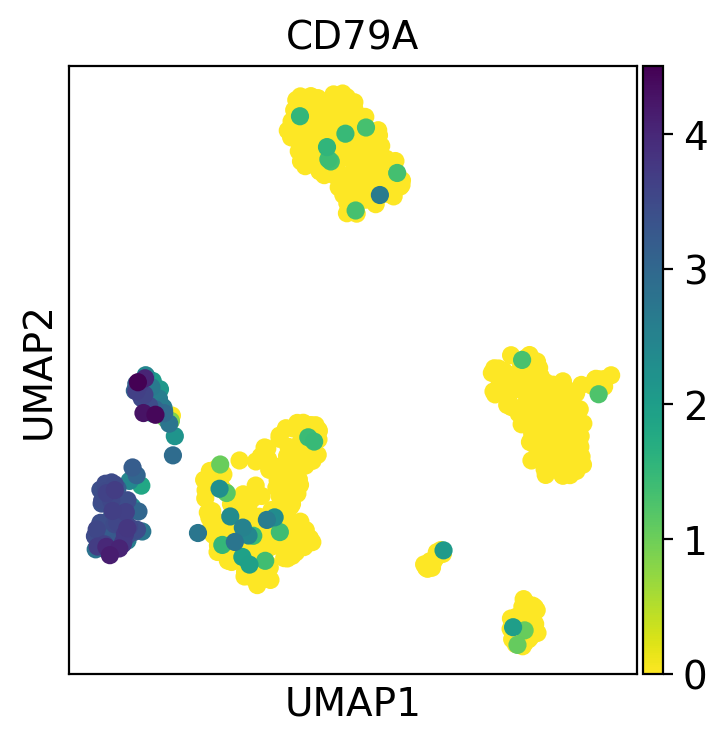

In [7]:
#Visualization of gene expression and other variables
# rcParams is used for the figure size, in this case 4x4
# plot value is given as the 'color' argument (can be any gene or any column in '.obs')
rcParams['figure.figsize'] = 4, 4
sc.pl.umap(pbmc, color='CD79A')

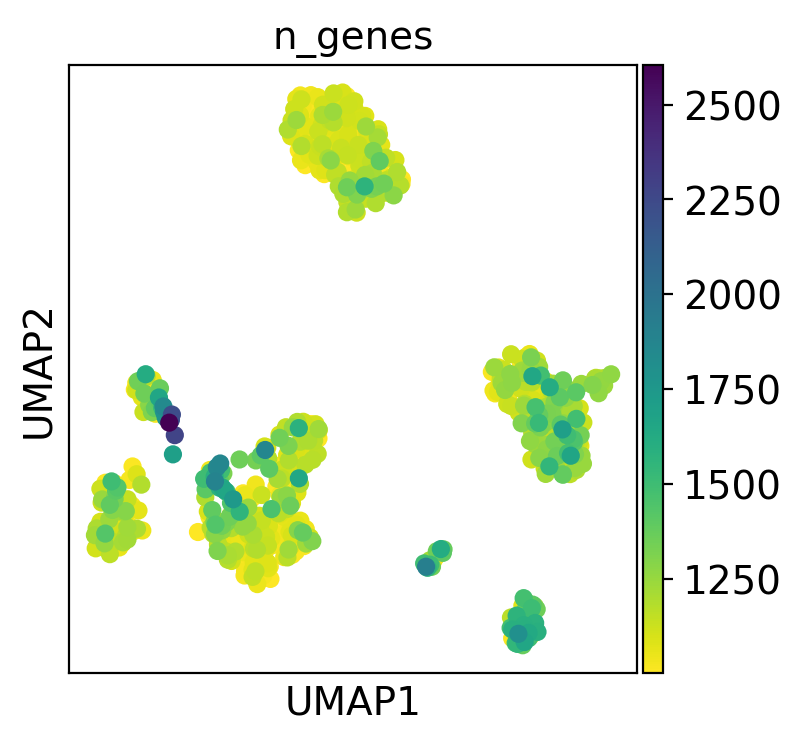

In [8]:
#Visualization of gene expression and other variables
# rcParams is used for the figure size, in this case 4x4
# plot value is given as the 'color' argument (can be any gene or any column in '.obs')
rcParams['figure.figsize'] = 4, 4
sc.pl.umap(pbmc, color='n_genes')

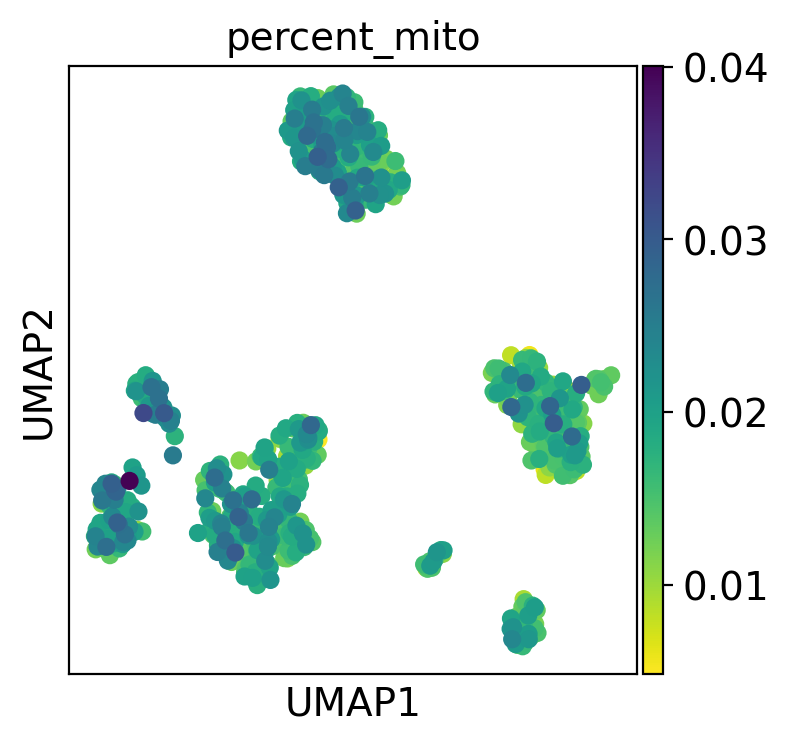

In [9]:
#Visualization of gene expression and other variables
# rcParams is used for the figure size, in this case 4x4
# plot value is given as the 'color' argument (can be any gene or any column in '.obs')
rcParams['figure.figsize'] = 4, 4
sc.pl.umap(pbmc, color='percent_mito')



*   **n_counts values** : is the number of UMI counts per cell (stored in .obs).
*   **bulk_labels value** : is a categorical value containing the original labelling of the cells from 10X.

using the 

*   **ncols function** :number of plots per row 
*  ** vmin/ vmax function **: used to adjust the maximum value/minimum value plotted.


*   **p99**:max value used is 99 percentile. 

*   **frameon=False** means to remove the boxes around the plots 

*   **s=50** means the dot size.

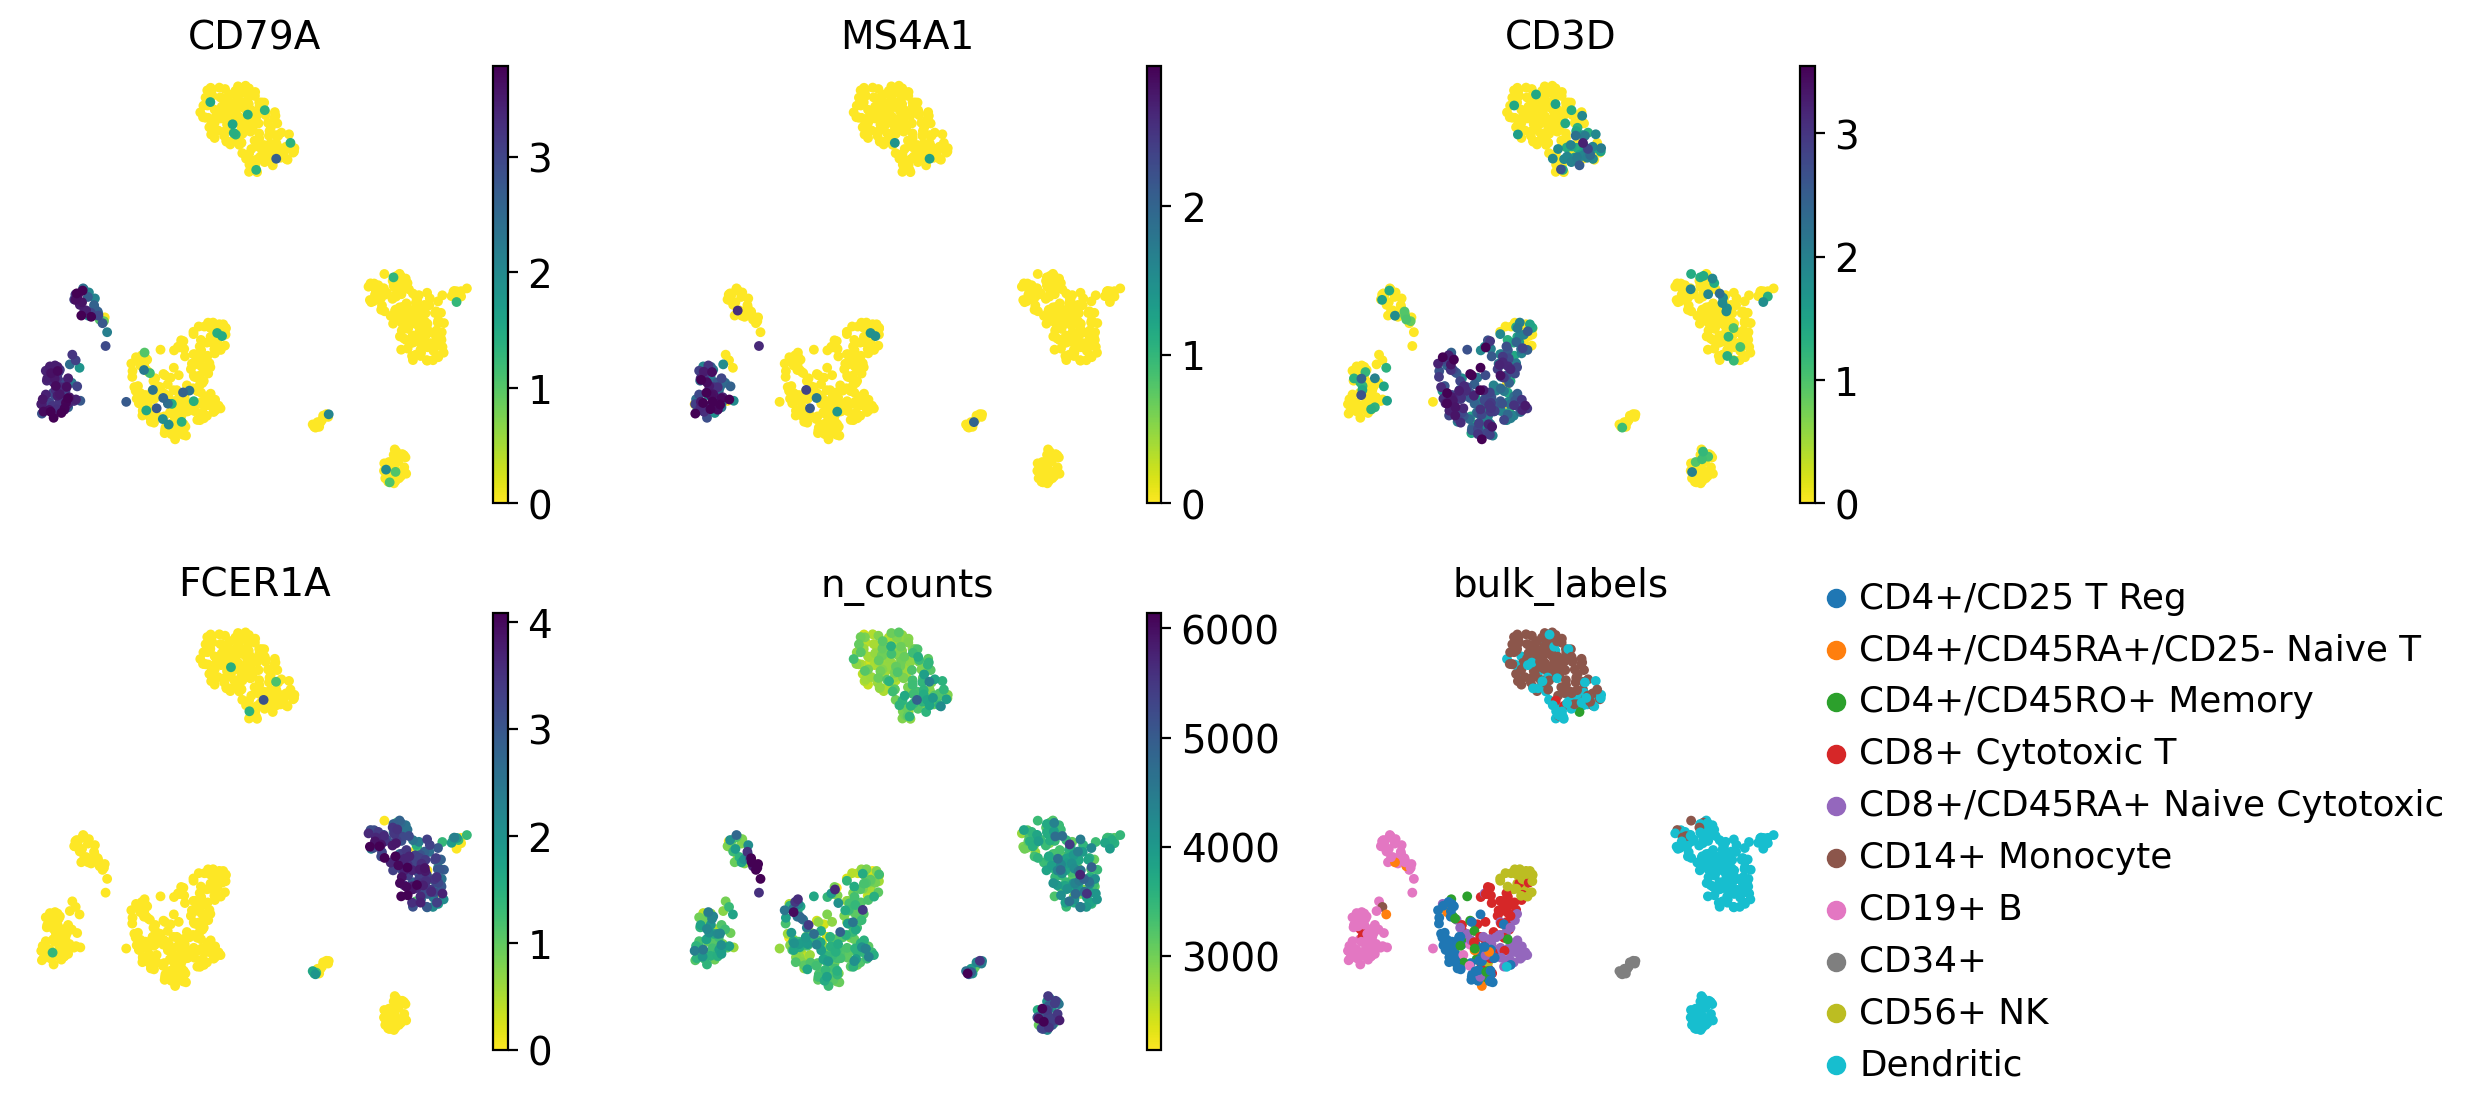

In [10]:
#Plot four genes: ‘CD79A’, ‘MS4A1’, ‘CD3D’, and ‘FCER1A’ to get an idea on where those marker genes are being expressed.
#and two other values: n_counts and bulk_labels
rcParams['figure.figsize'] = 3,3
sc.pl.umap(pbmc, color=['CD79A', 'MS4A1', 'CD3D', 'FCER1A', 'n_counts', 'bulk_labels'], s=50, frameon=False, ncols=3, vmax='p99')

**Results**: The above plot indicating the groups of cells that express the marker genes with the original cell labels.

In [ ]:
#!pip install leidenalg

In [12]:
#other way of clustering cells
# compute clusters using the leiden method and store the results with the name `clusters`
sc.tl.leiden(pbmc, key_added='clusters', resolution=0.5)

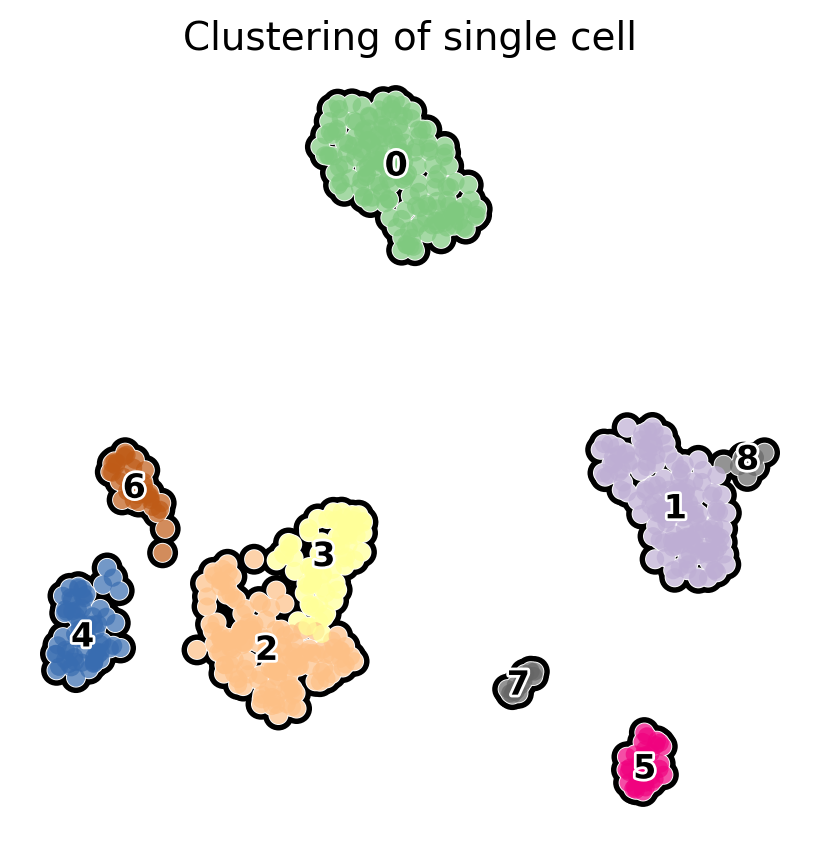

In [13]:
#Clustering single cell
rcParams['figure.figsize'] = 5, 5
sc.pl.umap(pbmc, color='clusters', add_outline=True, legend_loc='on data',
           legend_fontsize=12, legend_fontoutline=2,frameon=False,
           title='Clustering of single cell', palette='Accent')

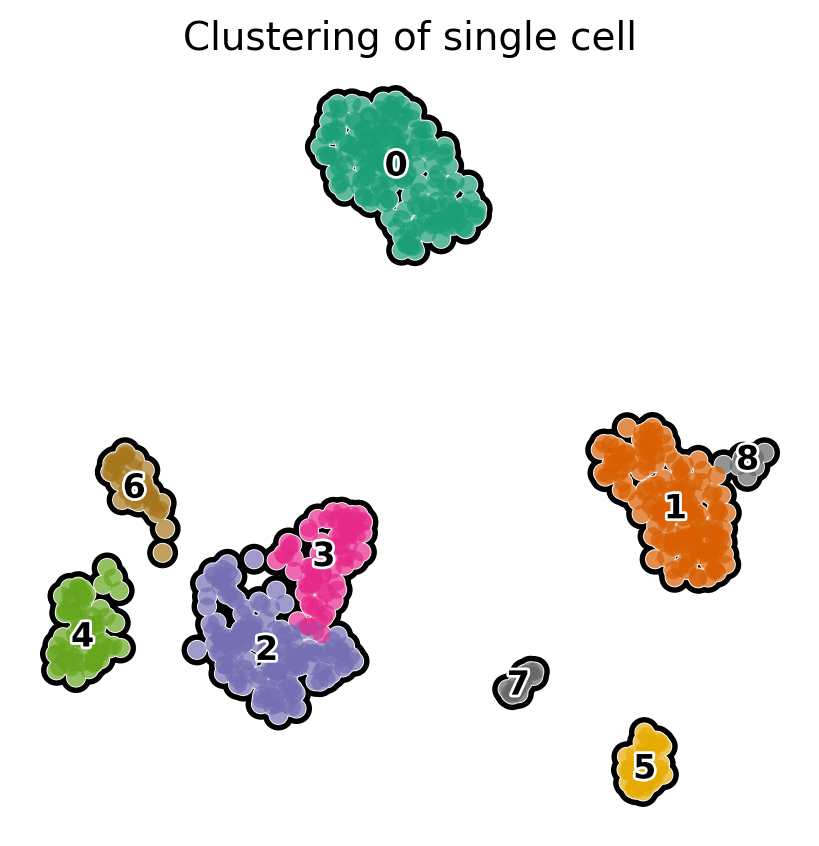

In [14]:
#Clustering single cell
rcParams['figure.figsize'] = 5, 5
sc.pl.umap(pbmc, color='clusters', add_outline=True, legend_loc='on data',
           legend_fontsize=12, legend_fontoutline=2,frameon=False,
           title='Clustering of single cell', palette='Dark2')


**3 types of color palettes** 
1.   Sequential palettes are suited to ordered data that progress from low to high (gradient).
2.   Qualitative palettes are best suited to represent nominal or categorical data.
3.   Diverging palettes put equal emphasis on mid-range critical values and extremes at both ends of the data range.
[Palettes types](https://www.datanovia.com/en/blog/the-a-z-of-rcolorbrewer-palette/)




# **Using known marker genes to identify cell cluster**

*   Clusters need to be labelled using well known marker genes.
*   We can identify the expression of a gene via scatter plots.


**Visualization of cellcluster associate with marker genes by**: 
1.   Dotplots
2.   Violin plots
3.   Heatmaps
4.   Tracksplot
**Note: **: All visualizations show the same information ( expression split by cluster) in different ways like

**Marker genes from literatures:**

*   **B-cells**: CD79A, MS4A1
*   **T-cell**: CD3D
*  **Dendritic cells**: FCER1A, CST3
*   **Myeloid**: CST3, LYZ
*   **Monocytes+FCGR3A**: FCGR3A,MS4A7
*   **CD14+Monocytes**: CD14,LYZ
*   **Megakaryocytes**: PPBP
*   **CD4 T cells**: IL7R
*   **NK**: GNLY, NKG7

In [15]:
#define marker genes dicitonary
marker_genes_dict = {'NK': ['GNLY', 'NKG7'],
                     'T-cell': ['CD3D'],
                     'B-cell': ['CD79A', 'MS4A1'],
                     'CD8-cell': ['CD8A'],
                     'CD4-cell': ['IL7R'],
                     'Monocytes': ['FCGR3A','MS4A1'],
                     'Dendritic': ['FCER1A','CST3']}

**1. Dotplot**
Visualizing differential gene expression across all clusters
Cluster numbers are also indicated on the left side, along with the number of differentially expressed genes in each cluster 

categories: 0, 1, 2, etc.
var_group_labels: NK, T-cell, B-cell, etc.


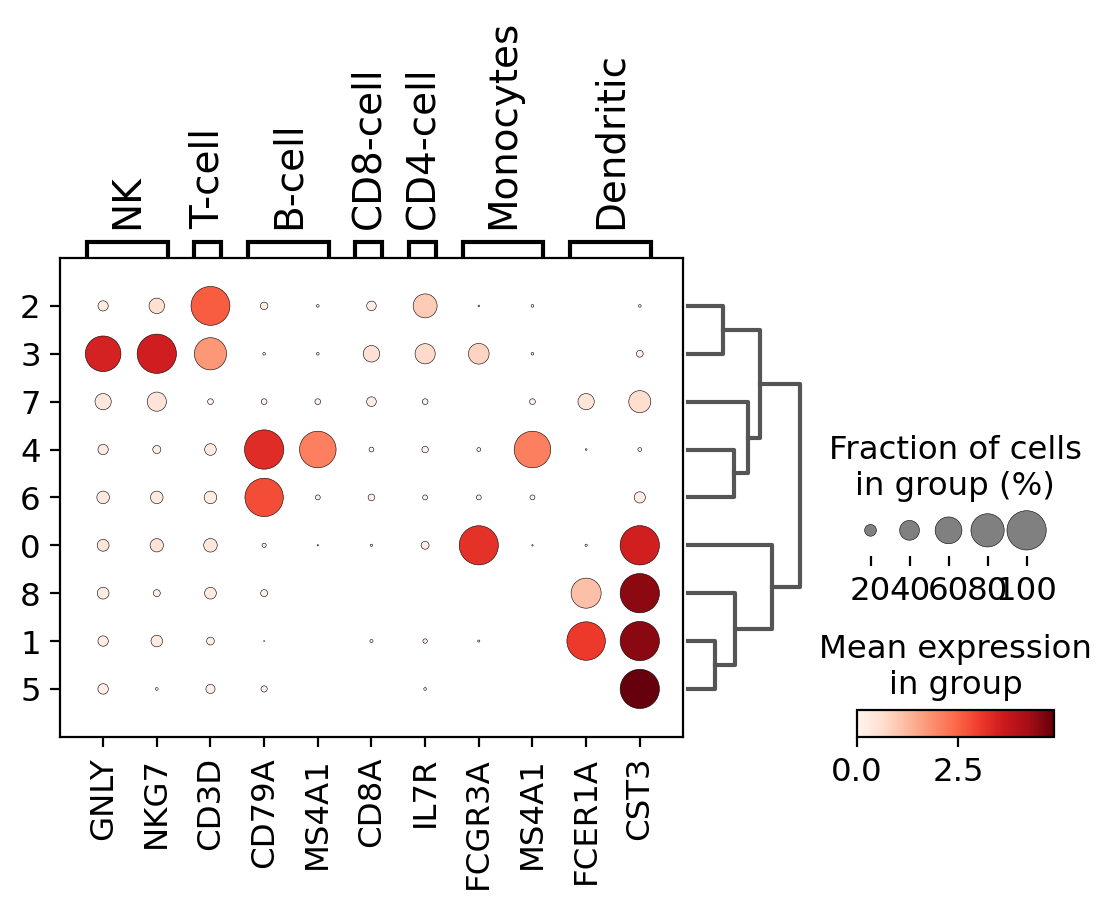

In [16]:
#add a dendrogram to the graph bring together the similarity of clusters
#The hierarchical clustering is computed automatically using the correlation of the PCA components between the clusters
sc.pl.dotplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True)

**Figure:**  A dot plot showing the relative expression of a subset of marker genes (x-axis) across all clusters (y-axis)
Darker colour indicates higher average gene expression from the cells in which the gene was detected, and larger dot diameter indicates that the gene was detected in greater proportion of cells from the cluster.

*   Color represents the mean expression within each of the categories (in this case in each cluster)
*   Dot size indicates the fraction of cells in the categories expressing a gene






In [17]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
     '0': 'Monocyte',
     '1': 'Dendritic',
     '2': 'T-cell',
     '3': 'NK',
     '4': 'T-cell',
     '5': 'B-cell',
     '6': 'Monocytes',
     '7': 'Dendritic',
     '8': 'other',
     '9': 'B-cell',
     '10': 'other',
     '11': 'Dendritic',
     '12': 'CD8-cell',
     '13': 'CD4-cell'
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
pbmc.obs['cell type'] = pbmc.obs['clusters'].map(cluster2annotation).astype('category')

categories: B-cell, Dendritic, Monocyte, etc.
var_group_labels: NK, T-cell, B-cell, etc.


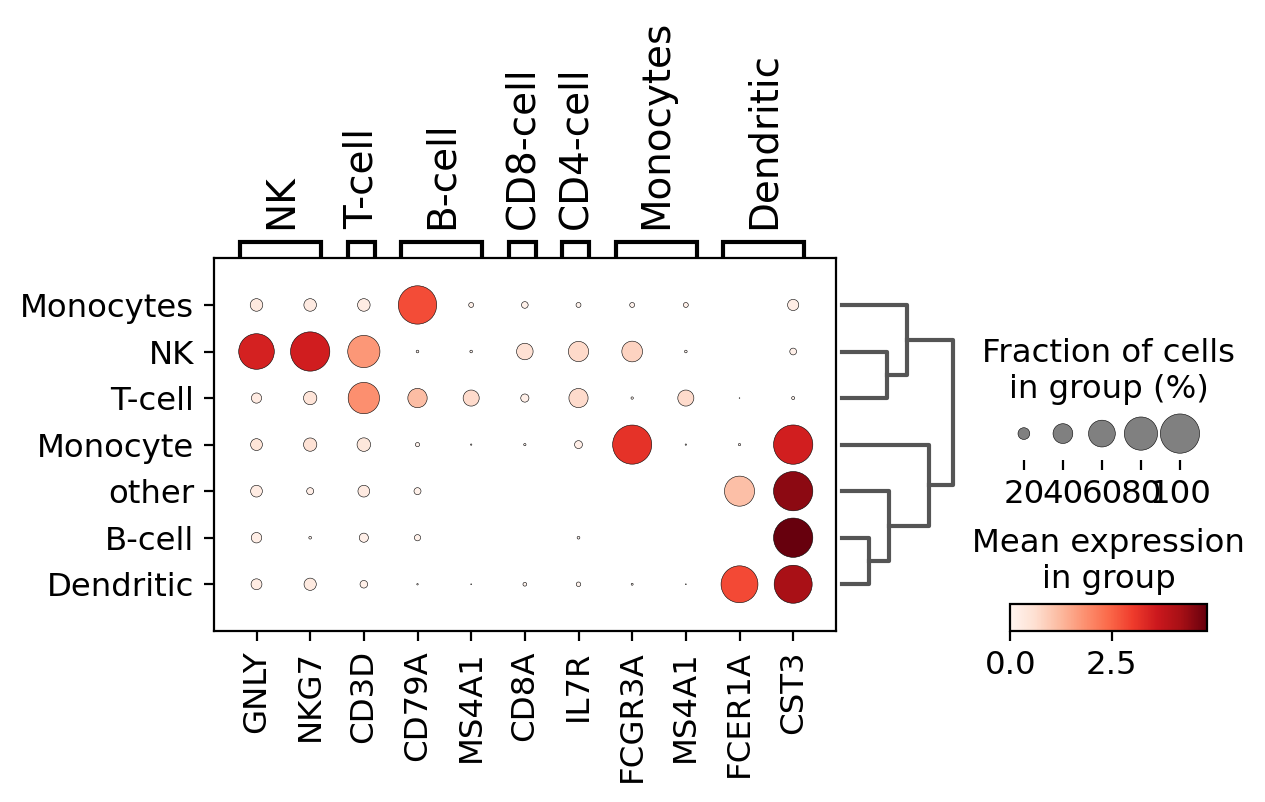

In [18]:
sc.pl.dotplot(pbmc, marker_genes_dict, 'cell type', dendrogram=True)

**Cell types**

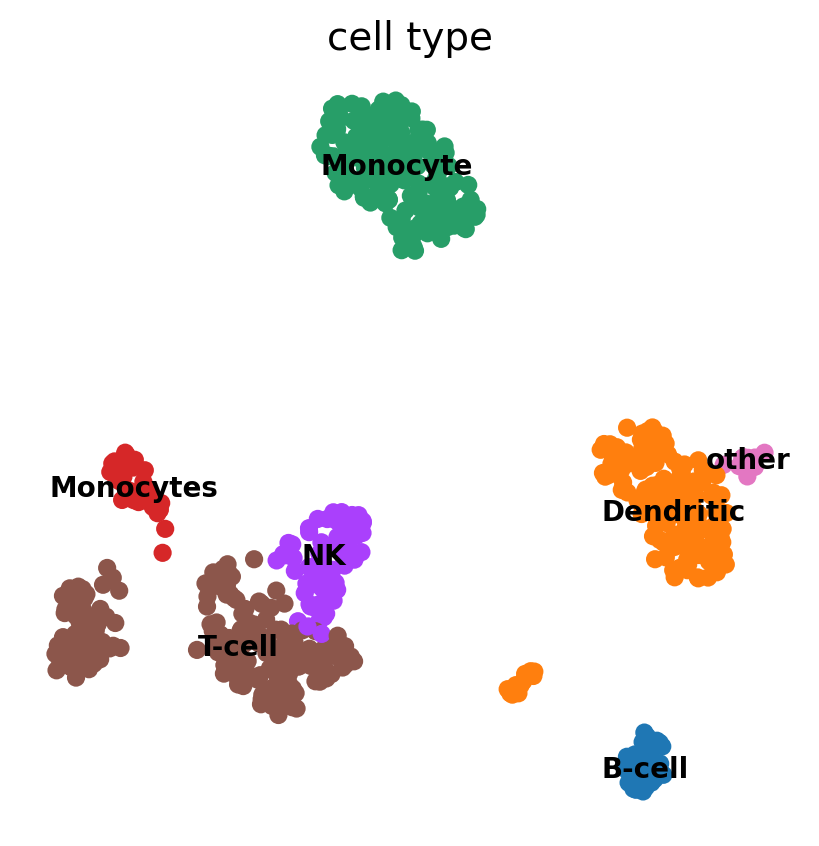

In [19]:
sc.pl.umap(pbmc, color='cell type', legend_loc='on data',
           frameon=False, legend_fontsize=10)

**Violin plot**

*   The violin plot help to scrutinize the markers
*   Indentify the distribution of gene expression values across cells
*   The black dots represent the values for individual cells.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


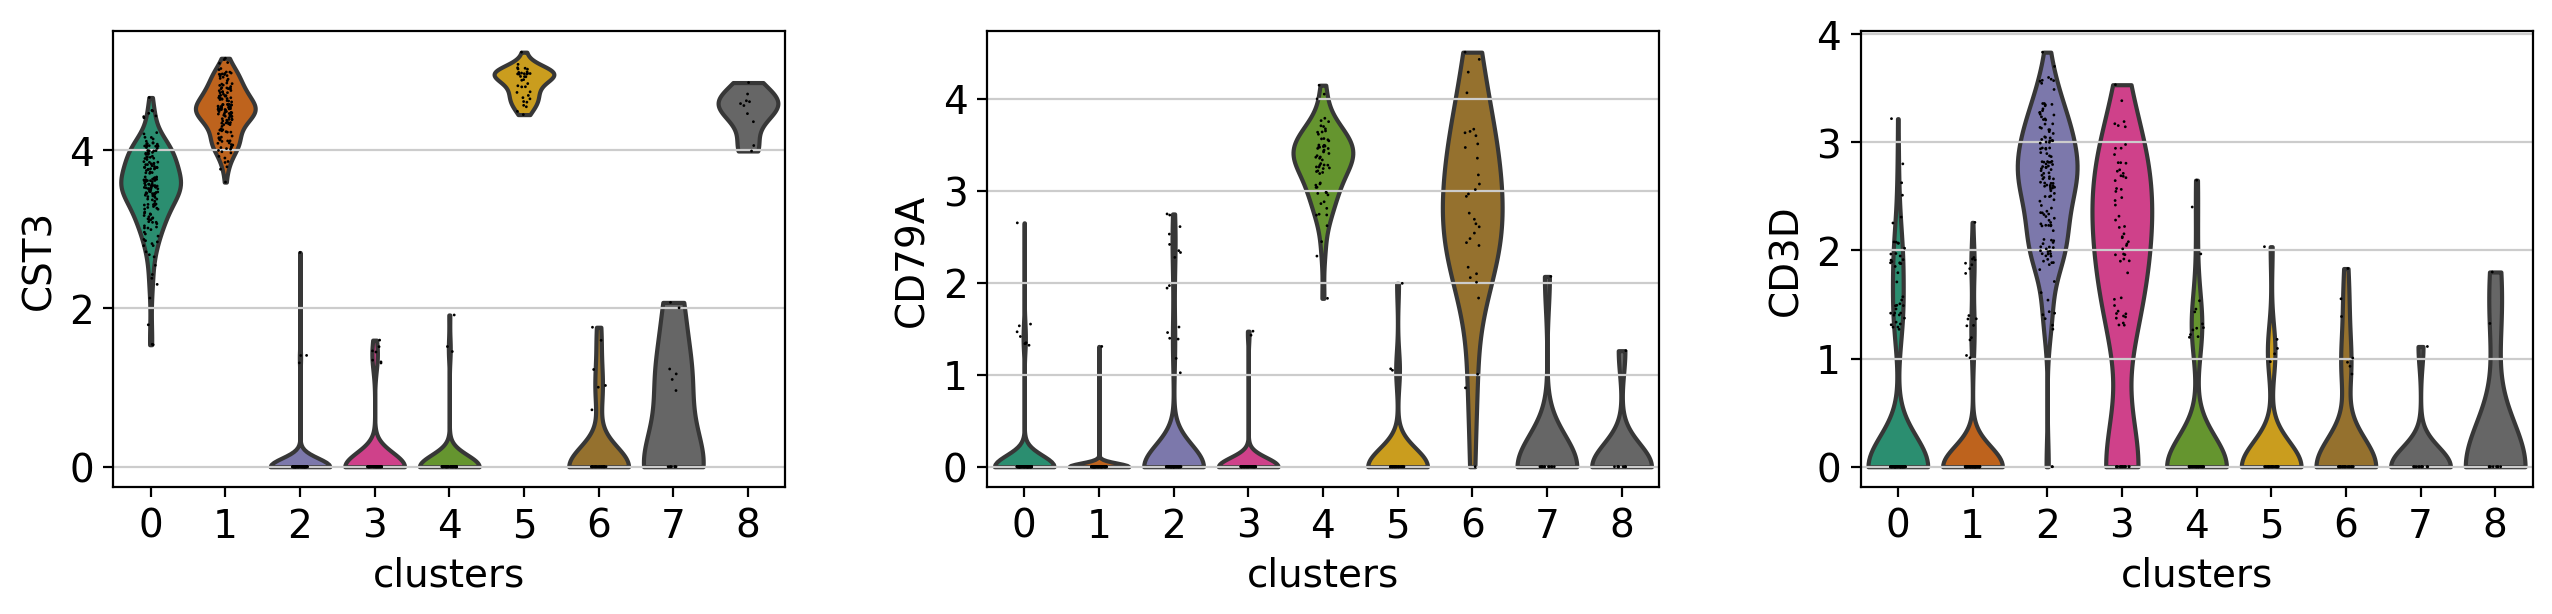

In [20]:
rcParams['figure.figsize'] = 4.5,3
sc.pl.violin(pbmc, ['CST3','CD79A', 'CD3D'], groupby='clusters' )

**Figure :** Violin plots demonstrate the expression of three markers of each cluster. The y-axis represents log-normalized expression
value
*   The expression of **CST3 **is high in clusters 0,1,5 and 8
*   The marker **CD79A** is highly expressed in clusters 4 and 6
*   The expression of **CD3D **is high in clusters 2 and 3

In [21]:
pbmc

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain', 'clusters', 'cell type'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'leiden', 'clusters_colors', "dendrogram_['clusters']", "dendrogram_['cell type']", 'cell type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

**Use violing plot to :**
compare the percentage of mitochondrial genes (percent_mito), cell cycle phases (G2M.Score and S.Score)  and the number of genes (n_genes) between the different clusters.

*   G2M.Score (module score of genes associated with the G2M phase of the cell cycle)
*   S.Score (module score of genes associated with the S phase of the cell cycle)

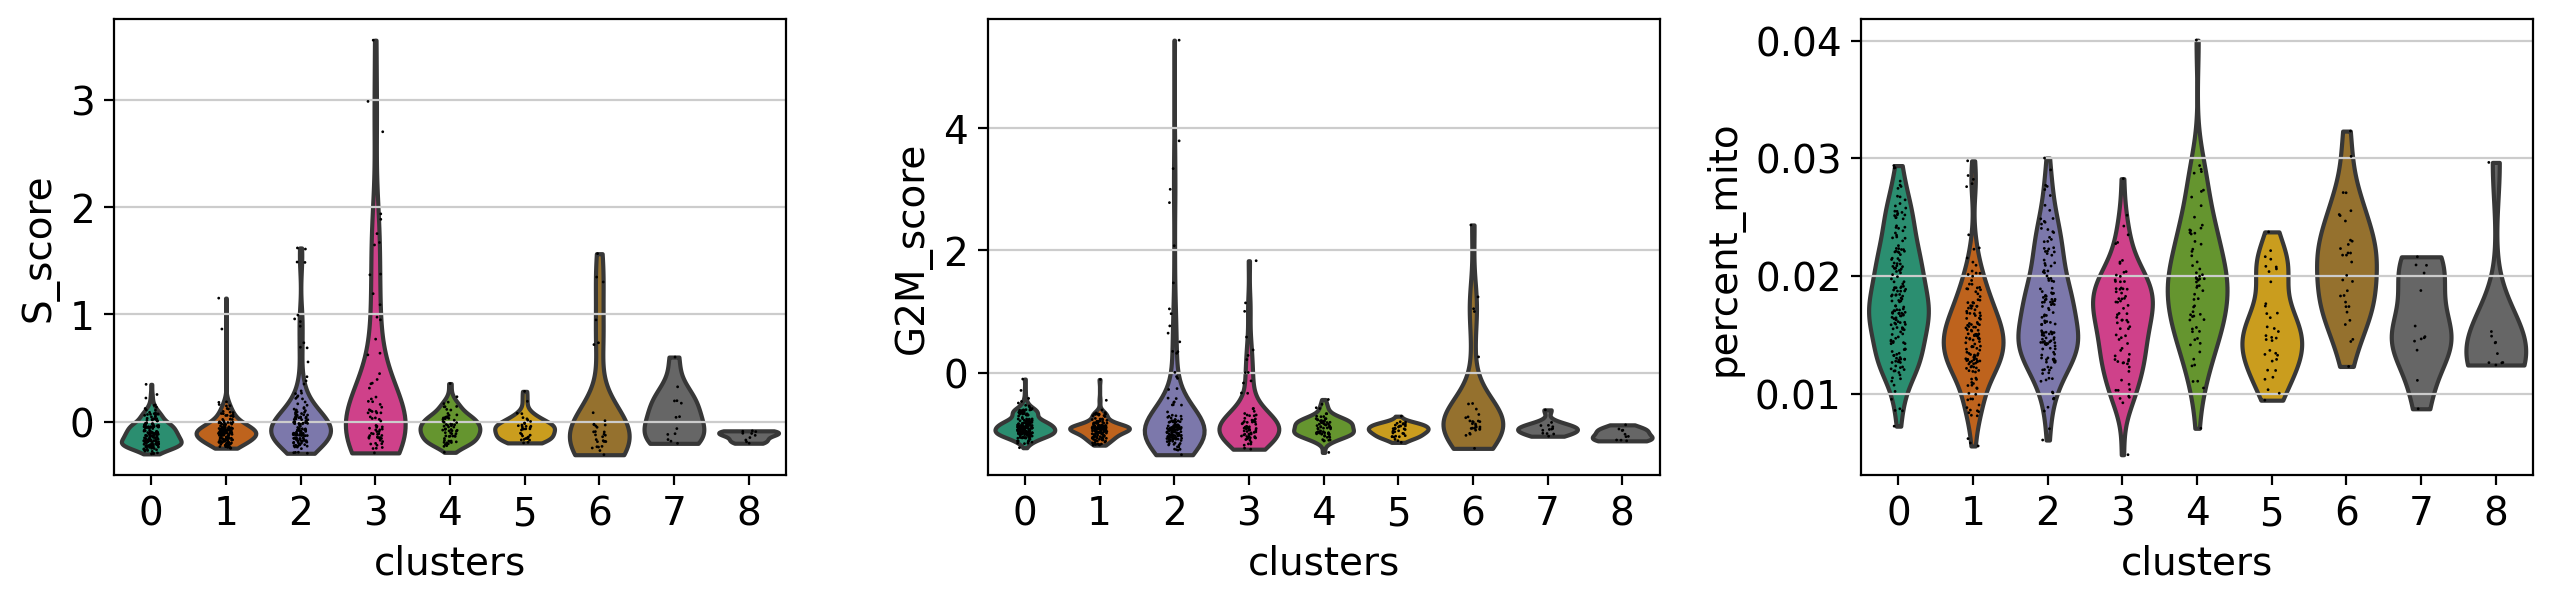

In [22]:
sc.pl.violin(pbmc, ['S_score','G2M_score','percent_mito'], groupby='clusters', stripplot=True)  

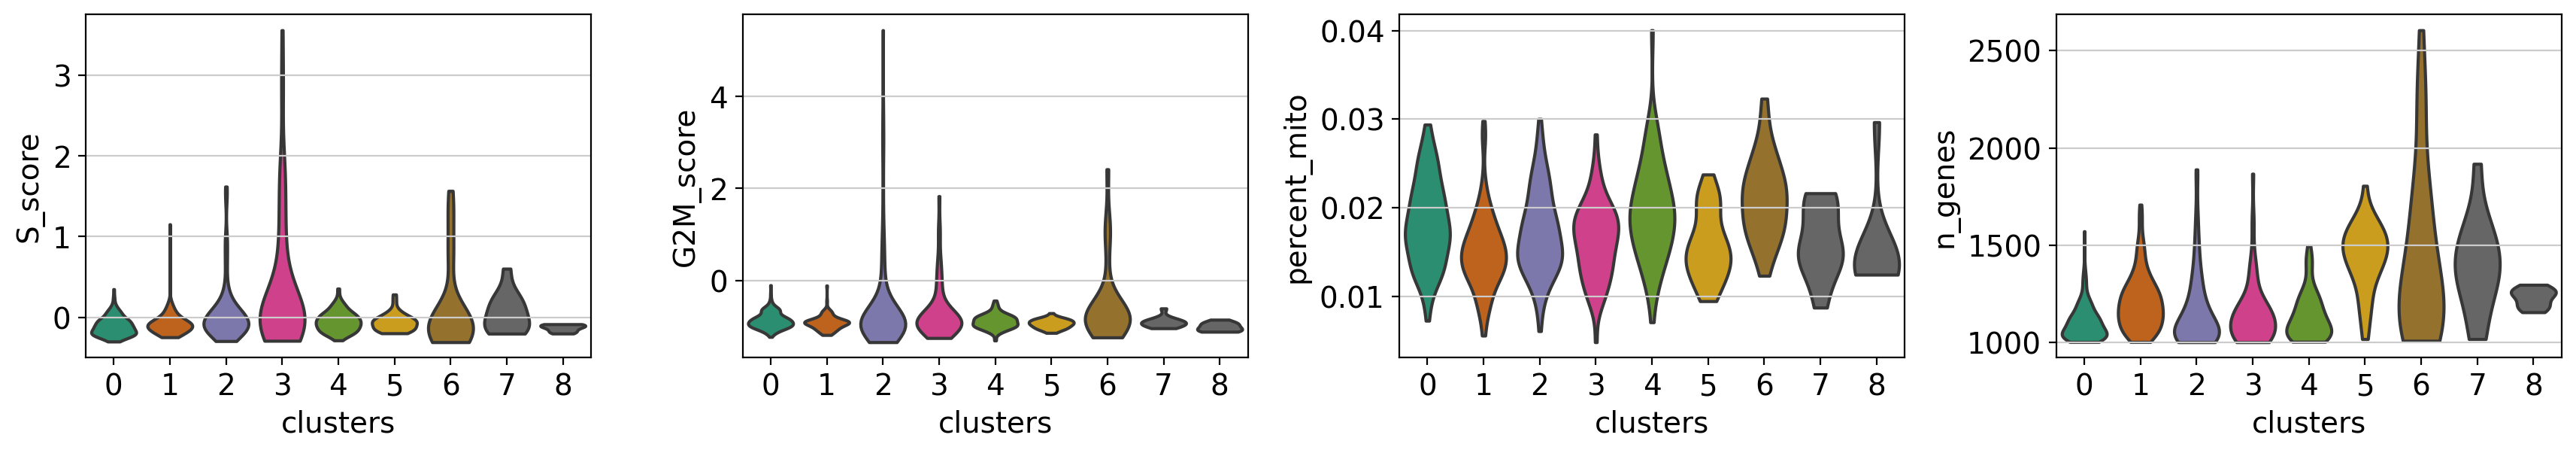

In [23]:
# remove the internal dots by using stripplot=False  
sc.pl.violin(pbmc, ['S_score','G2M_score','percent_mito','n_genes'], groupby='clusters', stripplot=False)  

**Stacked violin plot for visualizing single-cell data**

*   Makes a compact image composed of individual violin plots (from violinplot ()) stacked on top of each other. 
*   Useful to visualize gene expression per cluster.



categories: 0, 1, 2, etc.
var_group_labels: NK, T-cell, B-cell, etc.


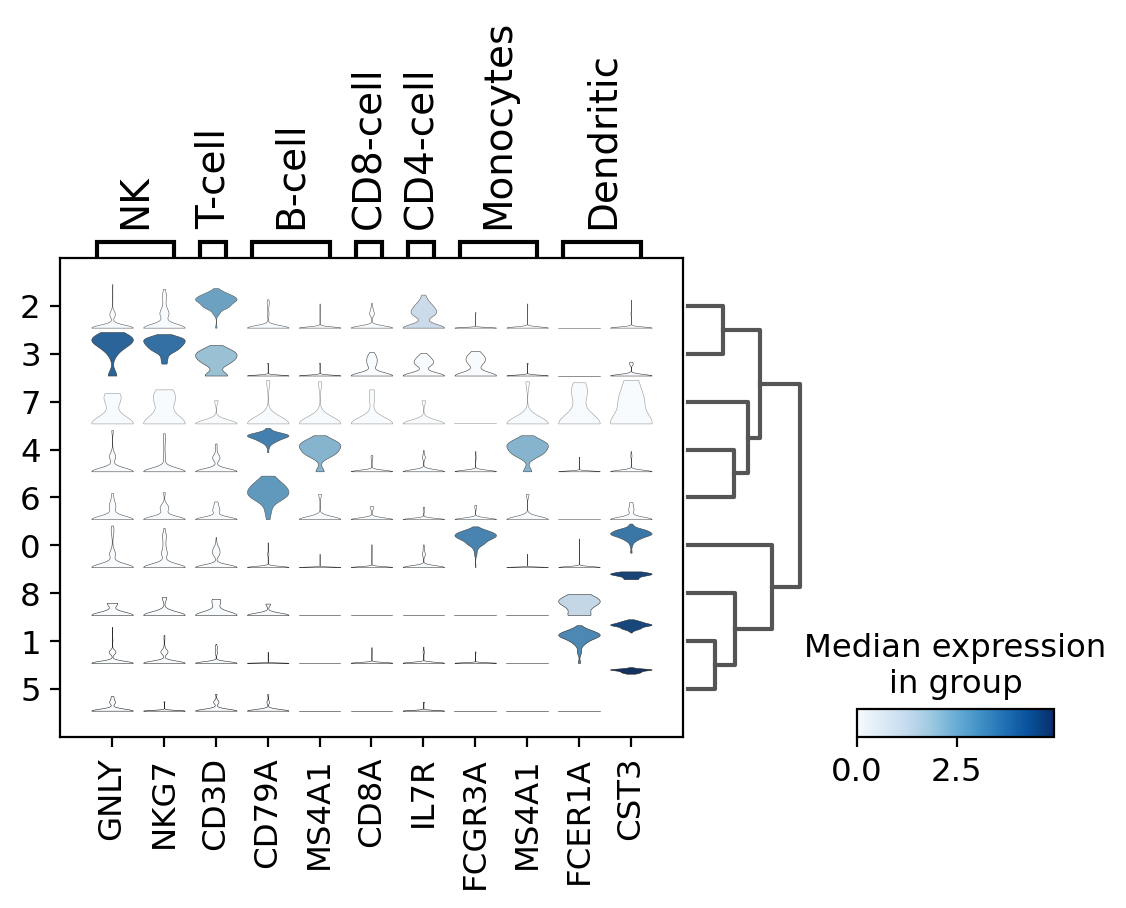

In [24]:
#Stacked violin plot with dendrogram
ax = sc.pl.stacked_violin(pbmc, marker_genes_dict, groupby='clusters', swap_axes=False, dendrogram=True)

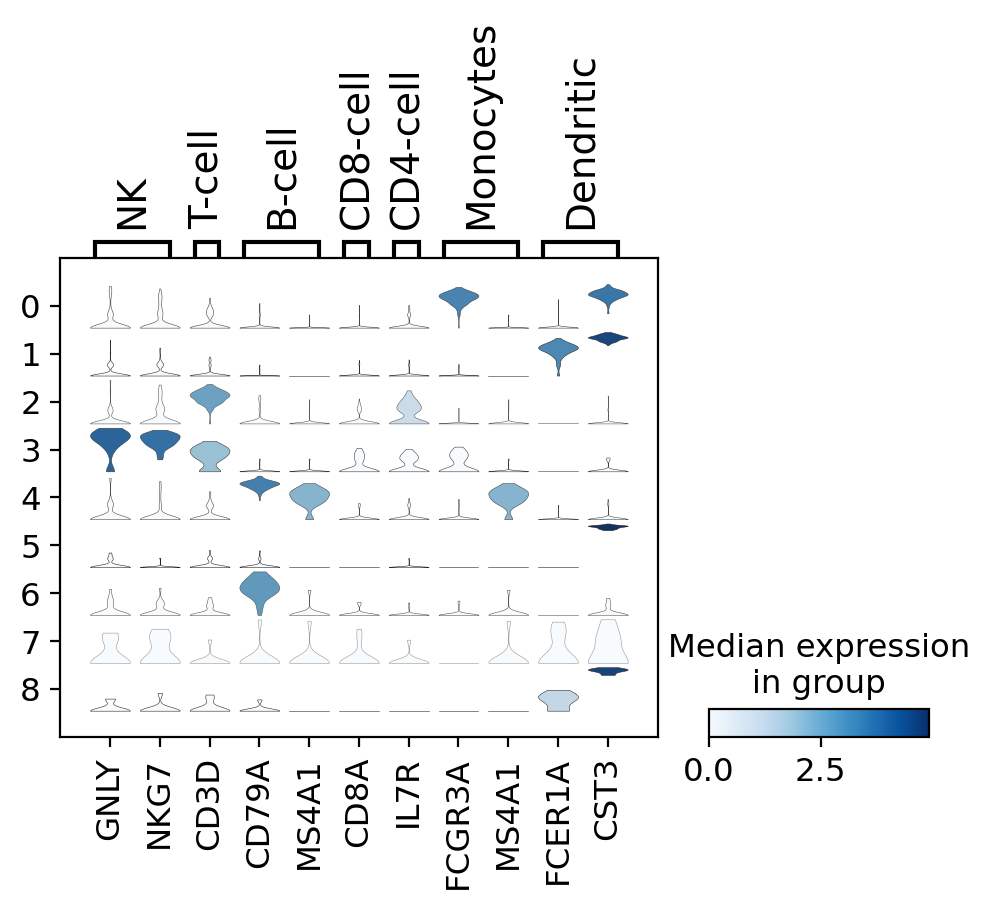

In [25]:
#Stacked violin plot without dendrogram
ax = sc.pl.stacked_violin(pbmc, marker_genes_dict, groupby='clusters', swap_axes=False, dendrogram=False)

**MatrixPlot **
The matrixplot function defines a three-dimensional graph where the x and y coordinates represent the row and column indices of A, respectively. The z values are the corresponding entries of A.

*   Generates a plot that gives a visual representation of the values of elements in a matrix.
*   Visualization of the largest connected component subgraph
*   Assess the relationships between several pairs of variables at once
*    all cells of a data matrix are visualized by rectangles





categories: 0, 1, 2, etc.
var_group_labels: NK, T-cell, B-cell, etc.


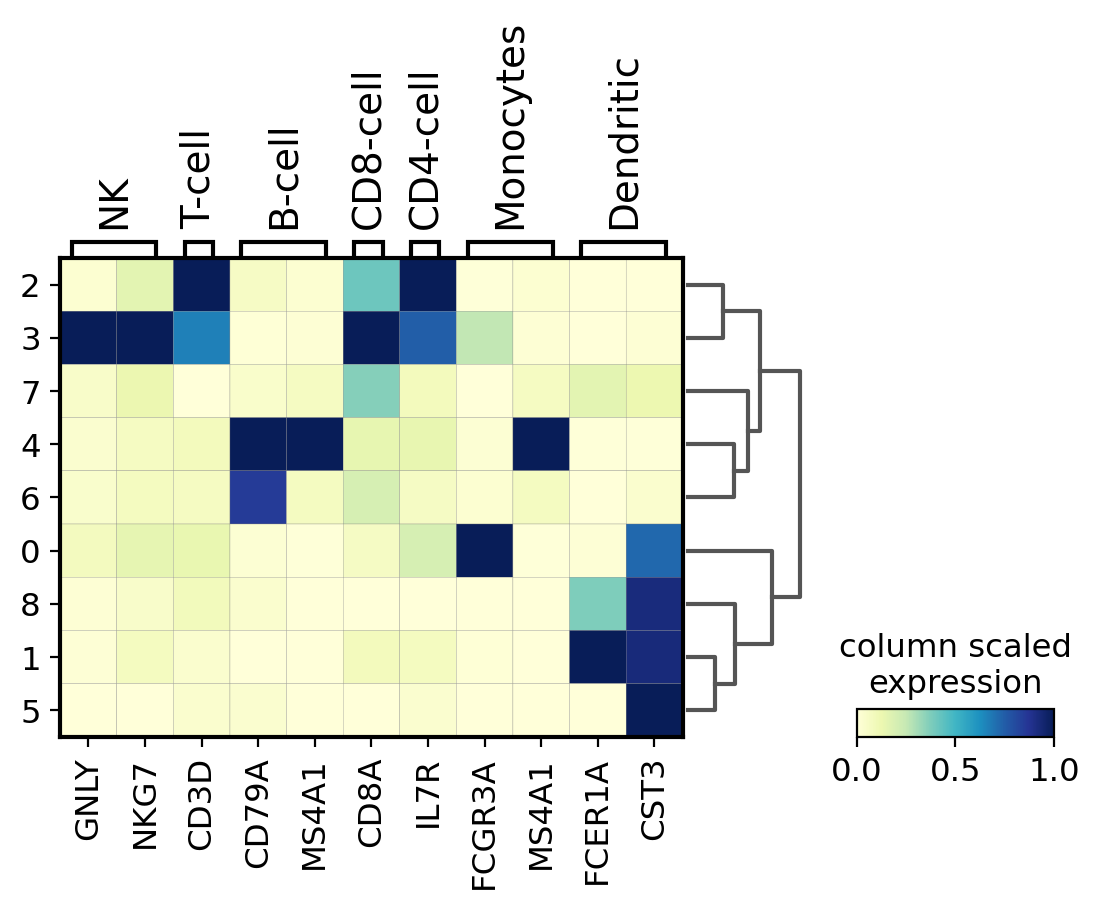

In [26]:
sc.pl.matrixplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True, cmap='YlGnBu', standard_scale='var', colorbar_title='column scaled\nexpression')

**Represent effectively the normalized scRNA gene expression using scale**

In [27]:
#first save the data under the 'scale' layer
pbmc.layers['scaled'] = sc.pp.scale(pbmc, copy=True).X

categories: 0, 1, 2, etc.
var_group_labels: NK, T-cell, B-cell, etc.


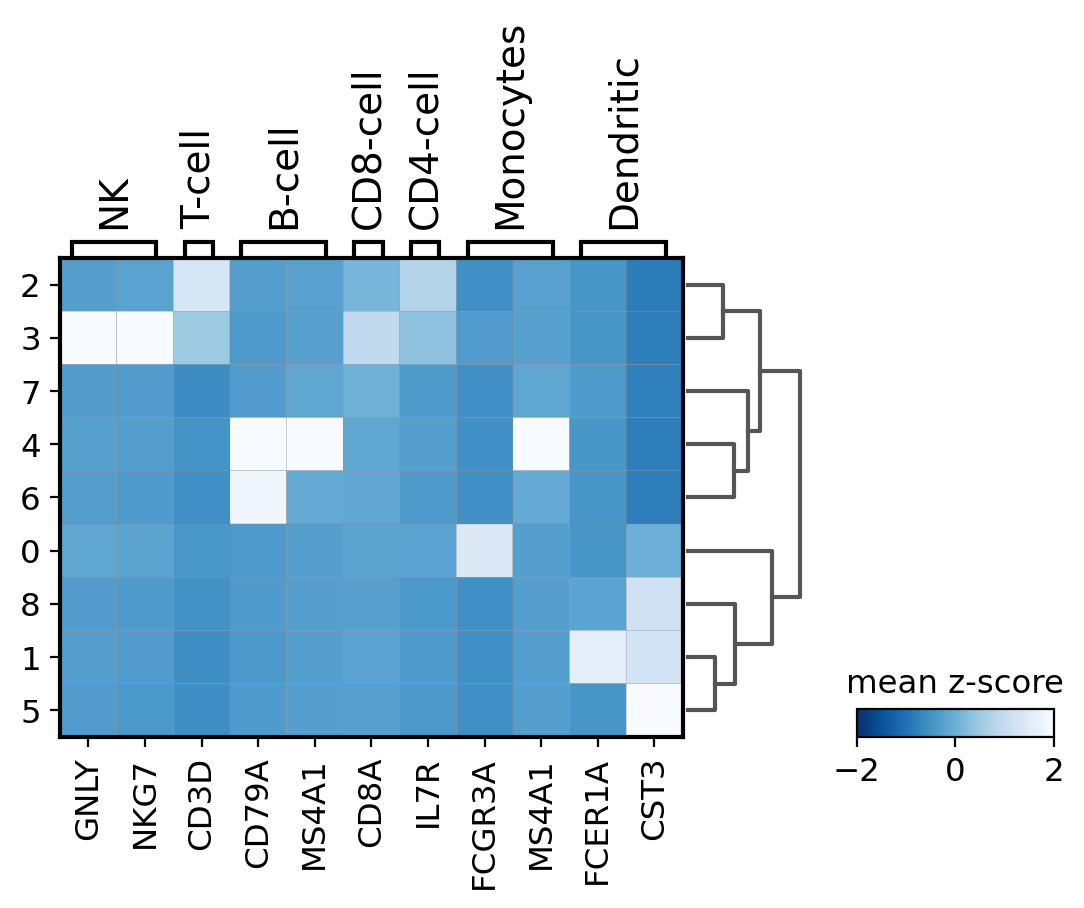

In [28]:
sc.pl.matrixplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True,
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='Blues_r')

**Combining plots in subplots**

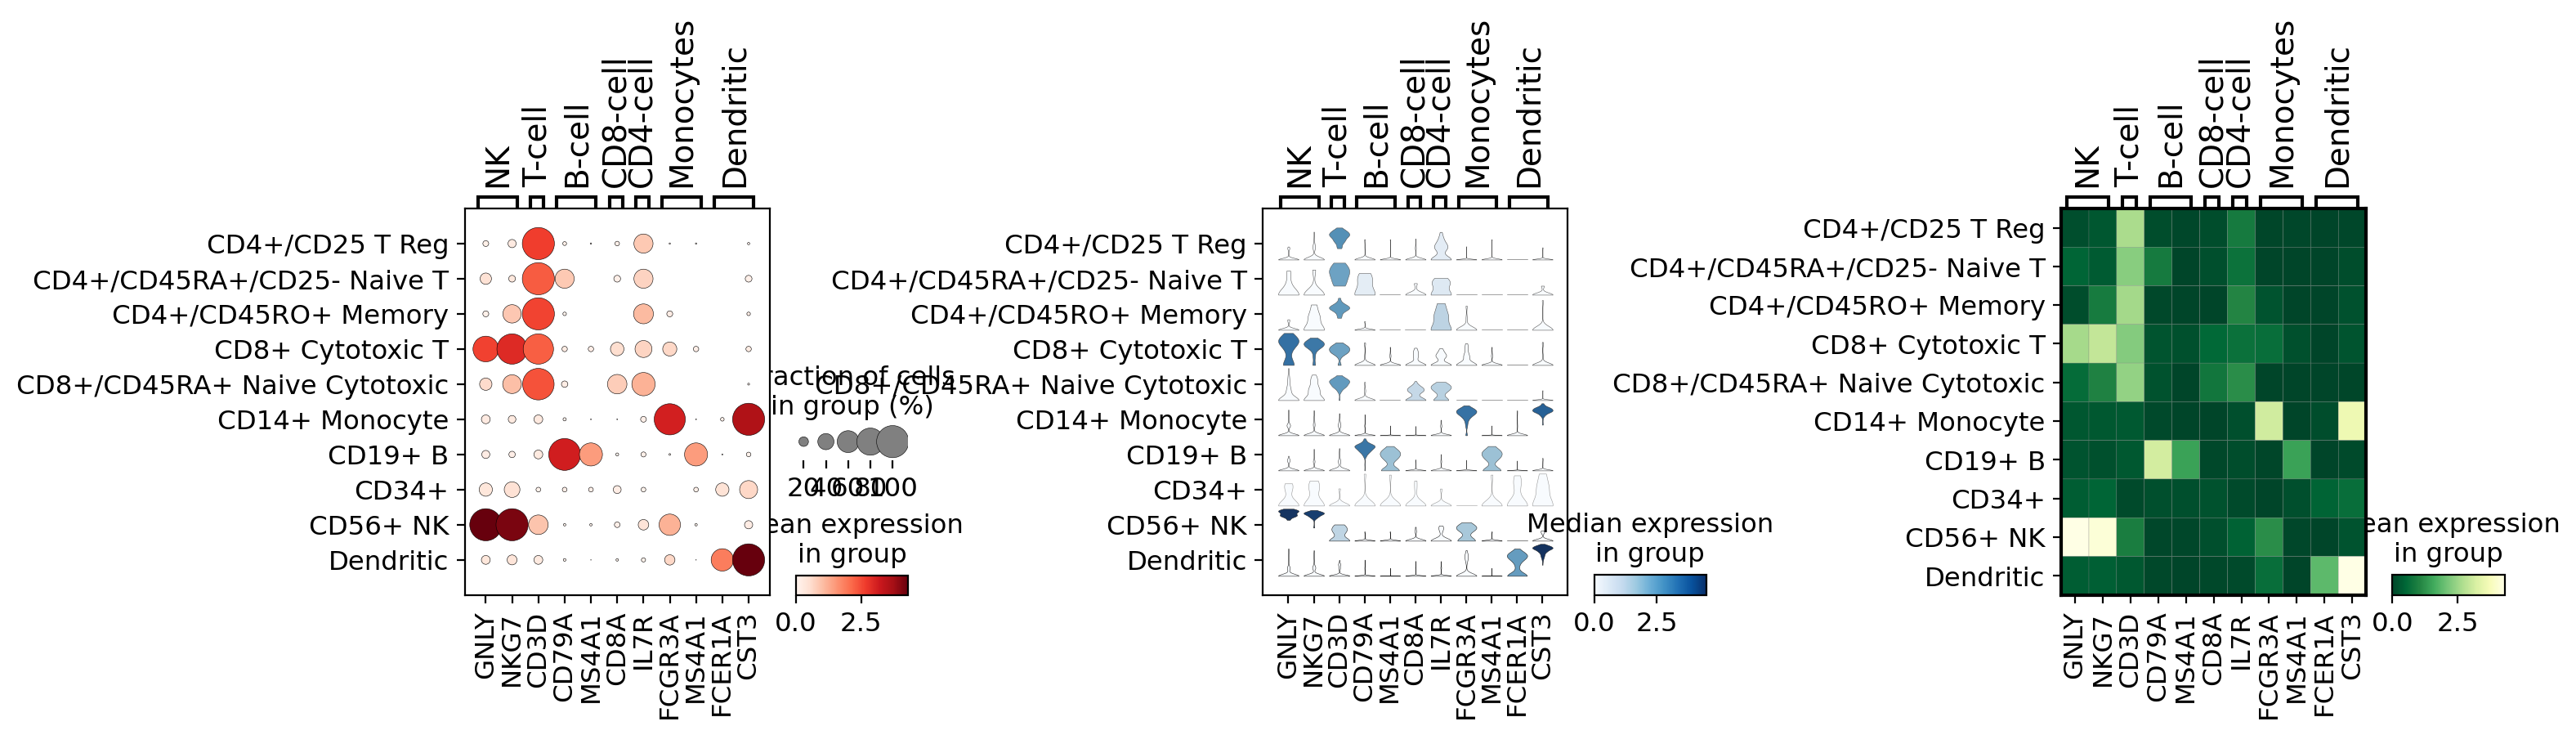

In [29]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4), gridspec_kw={'wspace':0.8})
ax1_dict = sc.pl.dotplot(pbmc, marker_genes_dict, groupby='bulk_labels', ax=ax1, show=False)
ax2_dict = sc.pl.stacked_violin(pbmc, marker_genes_dict, groupby='bulk_labels', ax=ax2, show=False)
ax3_dict = sc.pl.matrixplot(pbmc, marker_genes_dict, groupby='bulk_labels', ax=ax3, show=False, cmap='YlGn_r')

**Heatmap**

*   A heat map is a well-received approach to illustrate gene expression data

categories: 0, 1, 2, etc.
var_group_labels: NK, T-cell, B-cell, etc.


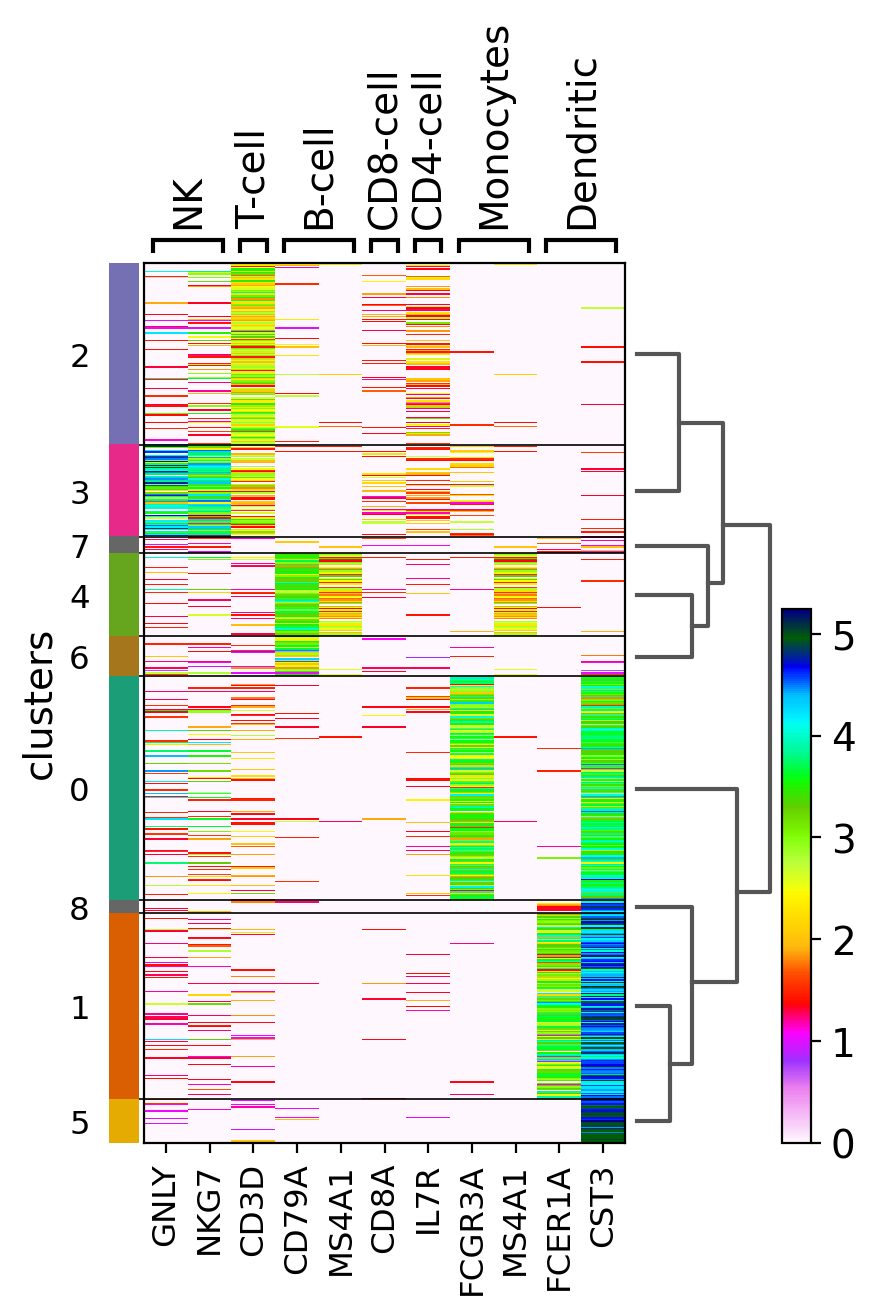

In [30]:
ax = sc.pl.heatmap(pbmc, marker_genes_dict, groupby='clusters', cmap='gist_ncar_r', dendrogram=True)

categories: 0, 1, 2, etc.
var_group_labels: NK, T-cell, B-cell, etc.


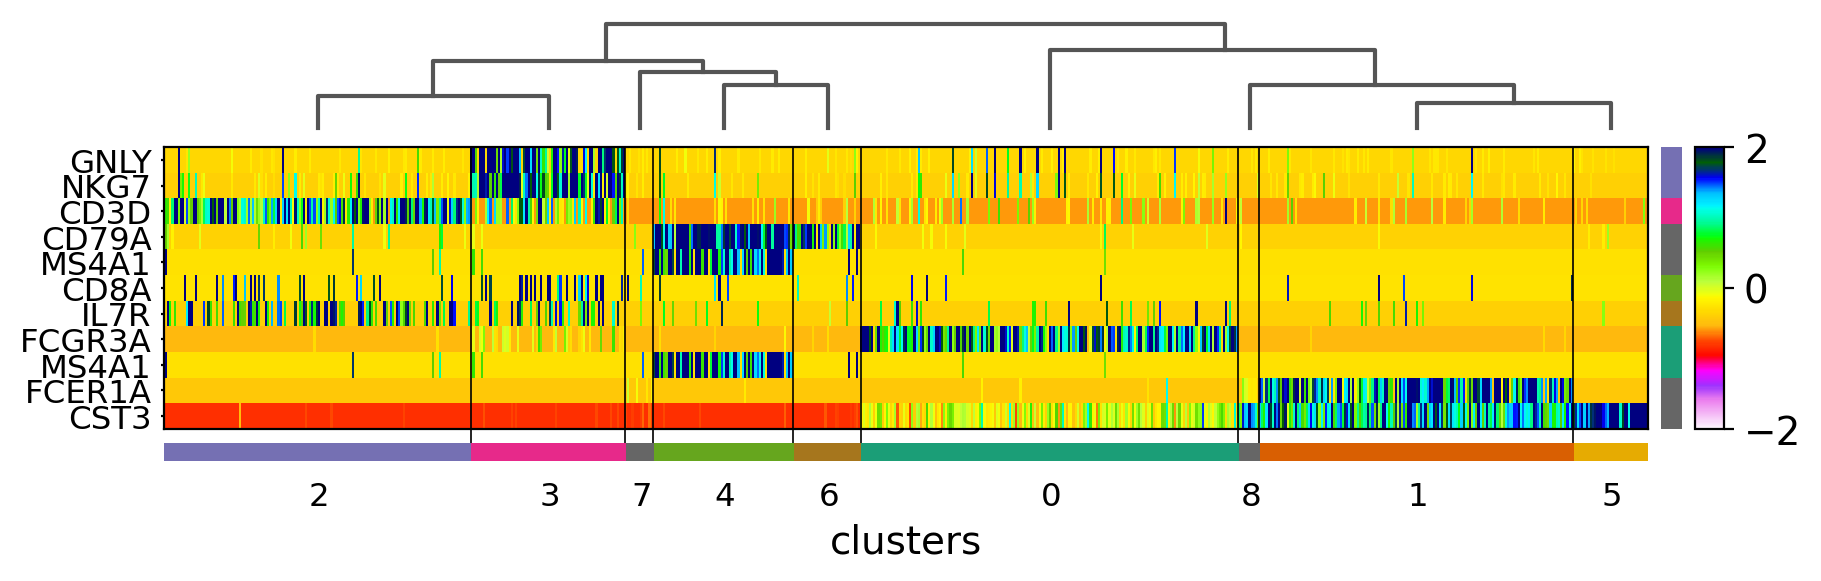

In [31]:
#The heatmap can also be plotted on scaled data
ax = sc.pl.heatmap(pbmc, marker_genes_dict, groupby='clusters', layer='scaled', vmin=-2, vmax=2, cmap='gist_ncar_r', dendrogram=True, swap_axes=True)

**Figure:** represent the similar infomation to the previous matrixplot the min and max had been adjusted and a divergent color map was used.

**Tracksplot** visualize the expression split by cluster

*   Summarize the same information like heatmap,instead of a color scale, the gene expression is represented by height.



categories: 0, 1, 2, etc.
var_group_labels: NK, T-cell, B-cell, etc.


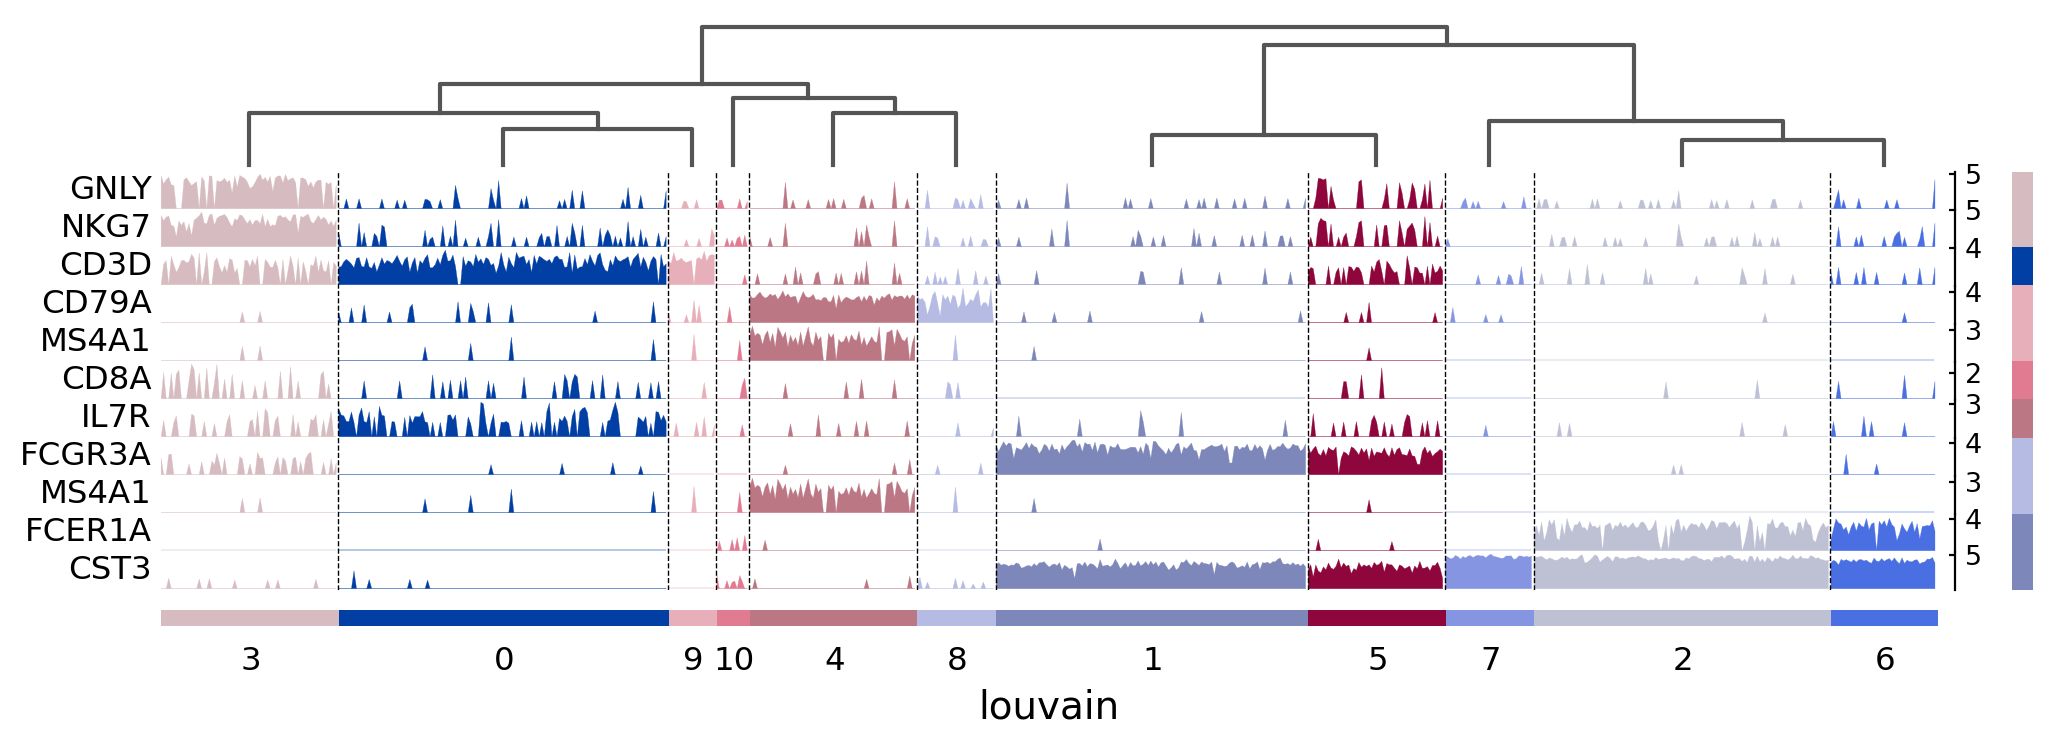

In [32]:
ax = sc.pl.tracksplot(pbmc,marker_genes_dict, groupby='louvain', dendrogram=True)

**Marker genes** (visualization)

 Identification of genes that are differentially expressed in the clusters or groups, instead of Instead of characterizing clusters by known gene markers (as previously figure showed)*italicized text*



*   '*sc.tl.rankg_genes_groups*' function take each group of cells and compare the distribution of each gene in a group against the distribution in all other cells not in the group. 
*   We will use the original cell labels given by 10x to identify marker genes for those cell types



In [33]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
# added `n_genes` to the saved data in all genes. 
#plot log fold changes or pvalues
sc.tl.rank_genes_groups(pbmc, groupby='clusters', n_genes=pbmc.shape[1], method='wilcoxon')

**Marker genes Visualization under dotplot**

*   A dot plot(dot chart) is a type of simple histogram-like chart used in statistics.
*   Dot plots are useful for visualizing the distribution of a numeric variable in a small data set.



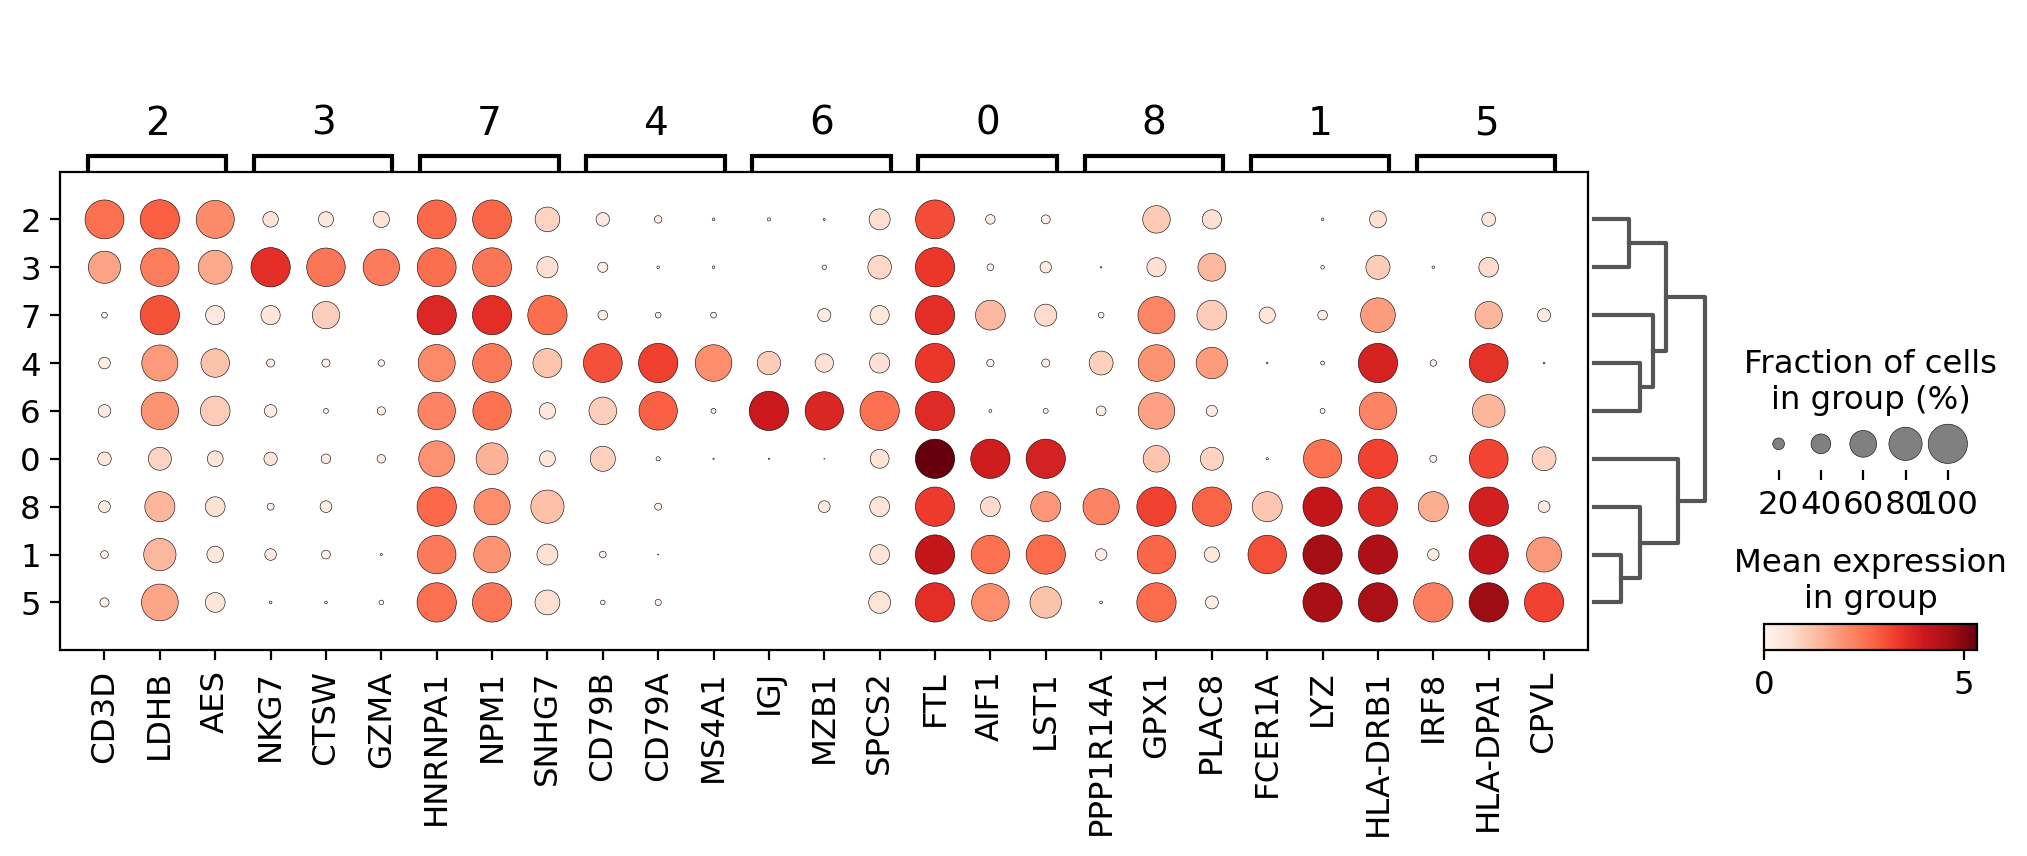

In [35]:
#show only the top 3 scoring genes
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=3)

**Log fold change**

*   *plot log fold changes* function : represent better than using gene expression
*   The conditions is to identify the genes that have a **log fold change >= 2** between the cell type expression and the rest of cells.
*   we adjust the max and min to be plotted and use a divergent color map because **log fold change is a divergent scale**



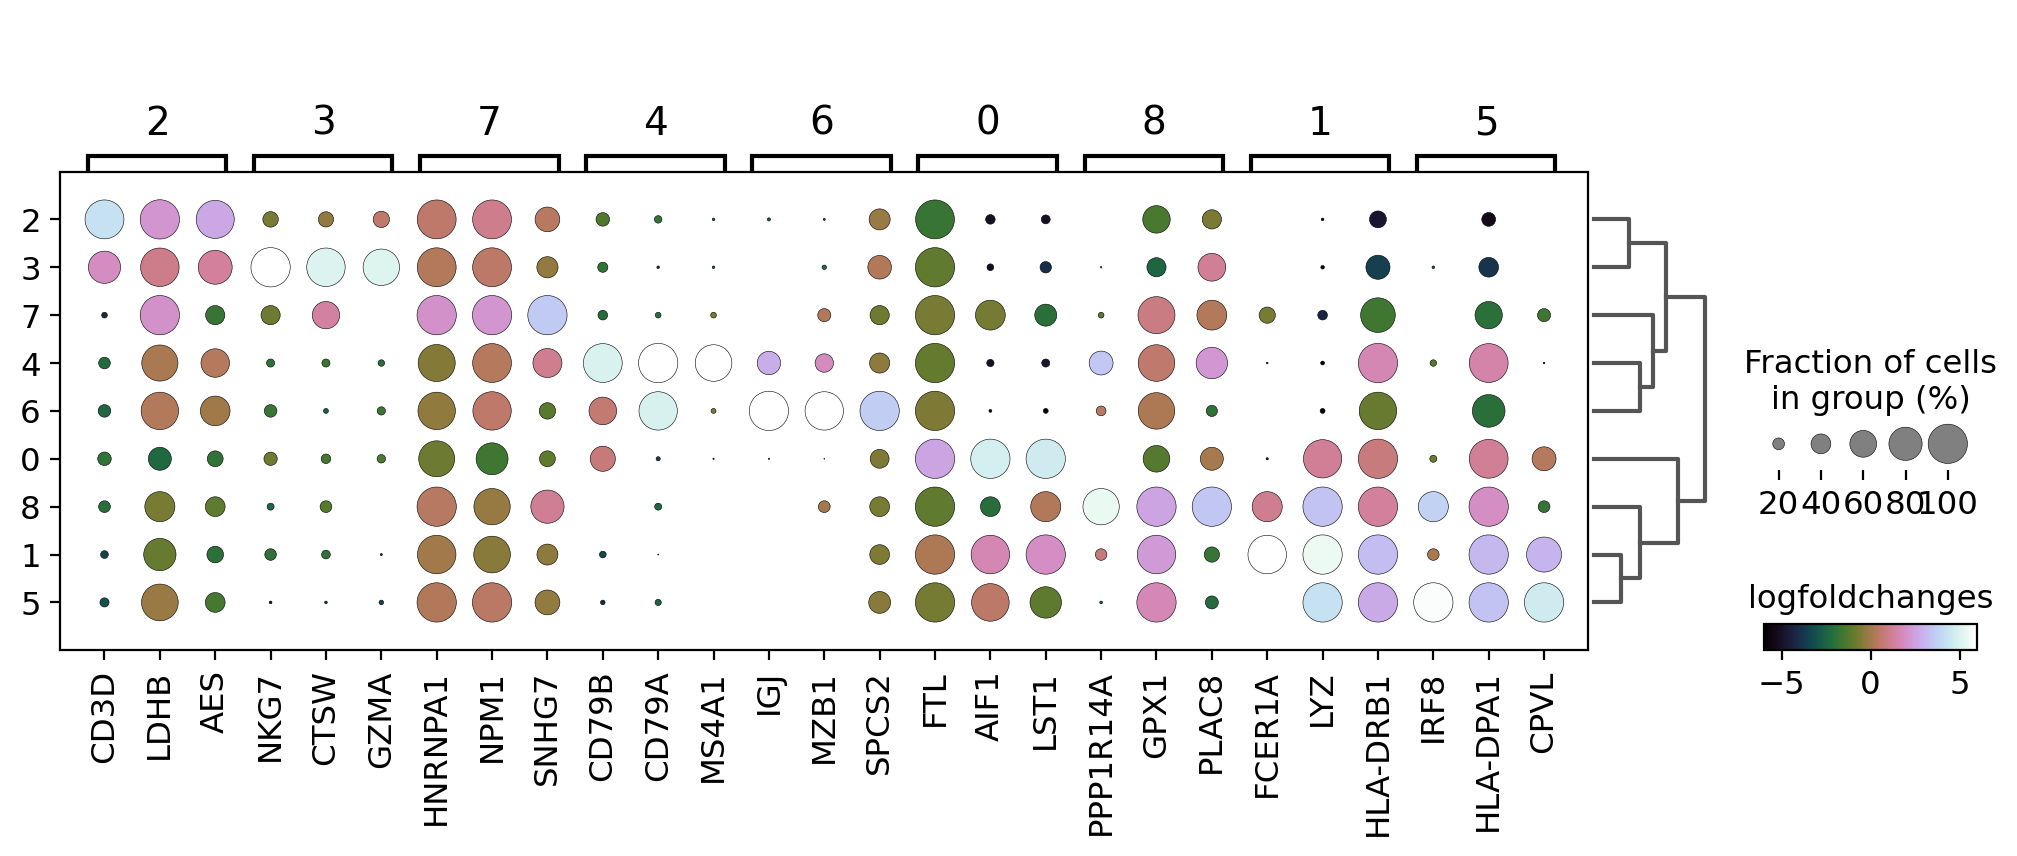

In [36]:
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=3, values_to_plot='logfoldchanges', min_logfoldchange=2, vmax=6, vmin=-6, cmap='cubehelix')

**Dotplot for particular groups**


*   Focusing only on 3 groups
*   visualize all the genes that have a min_logfoldchange=5 up to 20 genes.

**Note**: the groups option is also available for violin, heatmap and matrix  plots

categories: 0, 1, 2, etc.
var_group_labels: 1, 3, 4


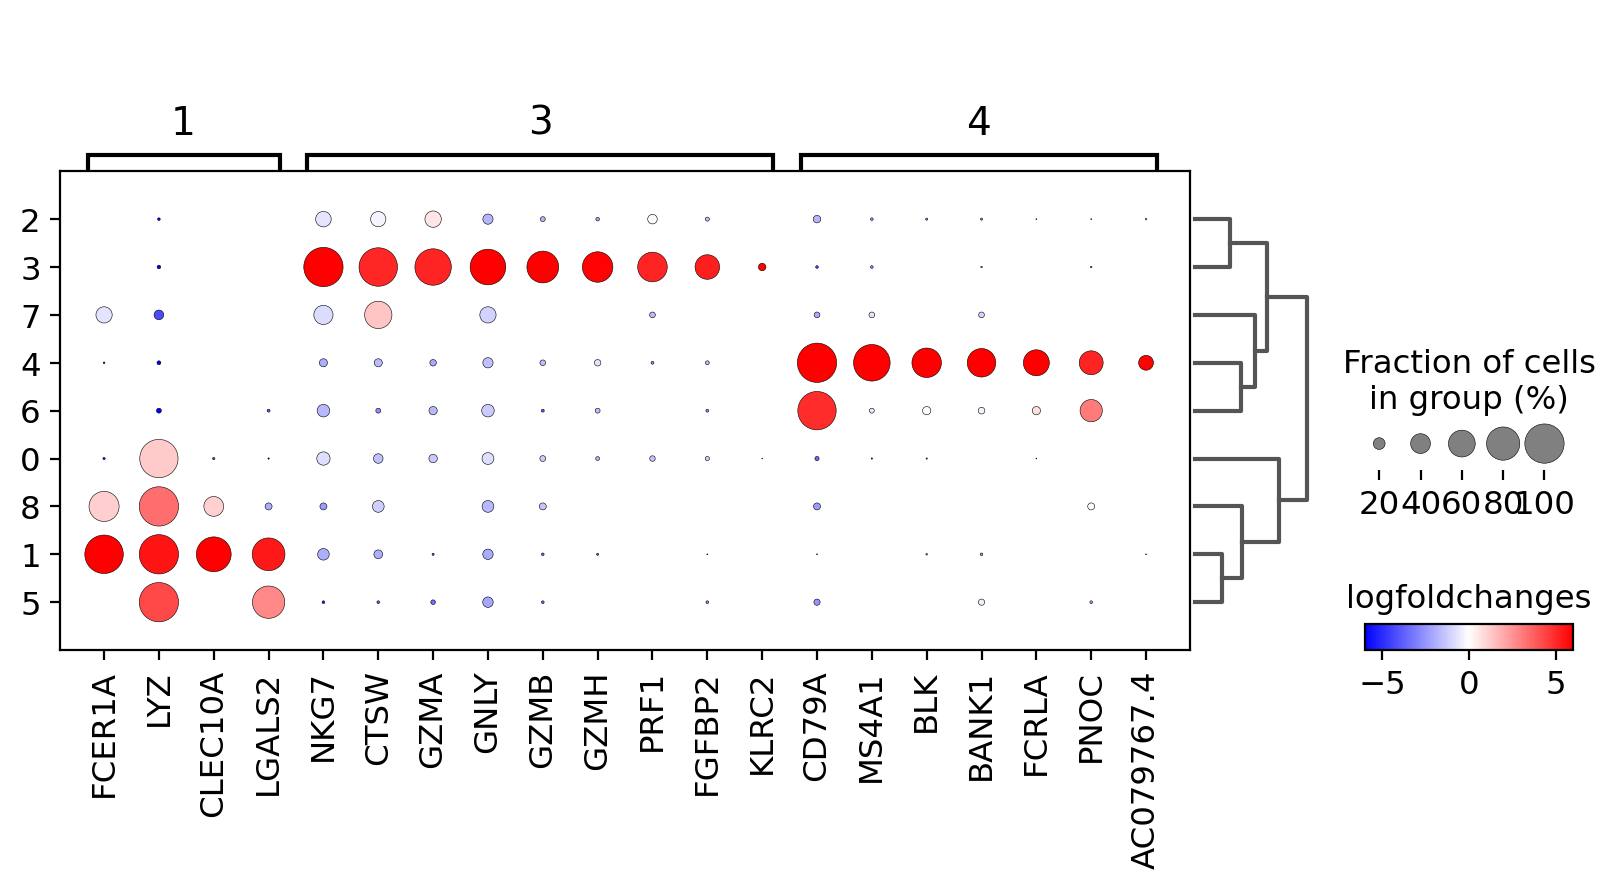

In [37]:
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=20, values_to_plot='logfoldchanges', min_logfoldchange=5, vmax=6, vmin=-6, cmap='bwr', groups=['1','3', '4'])

**You can use stacked violin plots for visualization Marker genes**

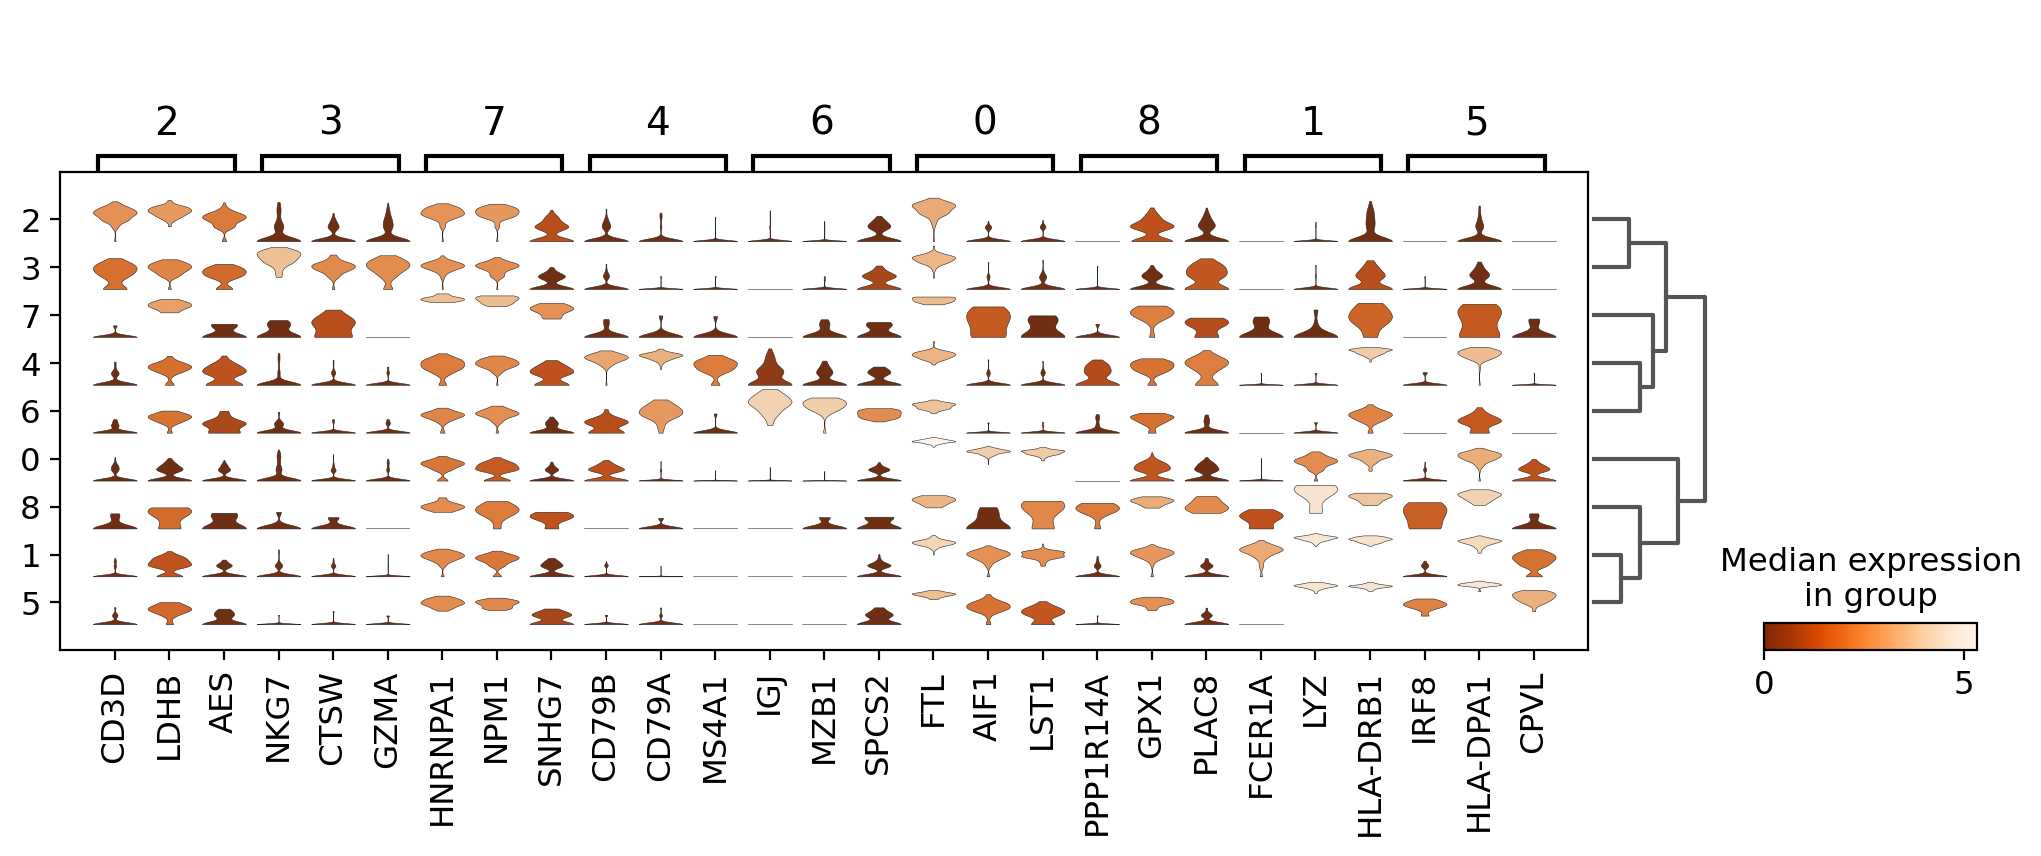

In [47]:
sc.pl.rank_genes_groups_stacked_violin(pbmc, n_genes=3, cmap='Oranges_r')

**You can use matrixplot for visualization Marker genes**

*   Use the previous computed data saved in layer scaled （scaled values）and combined with a divergent color map.

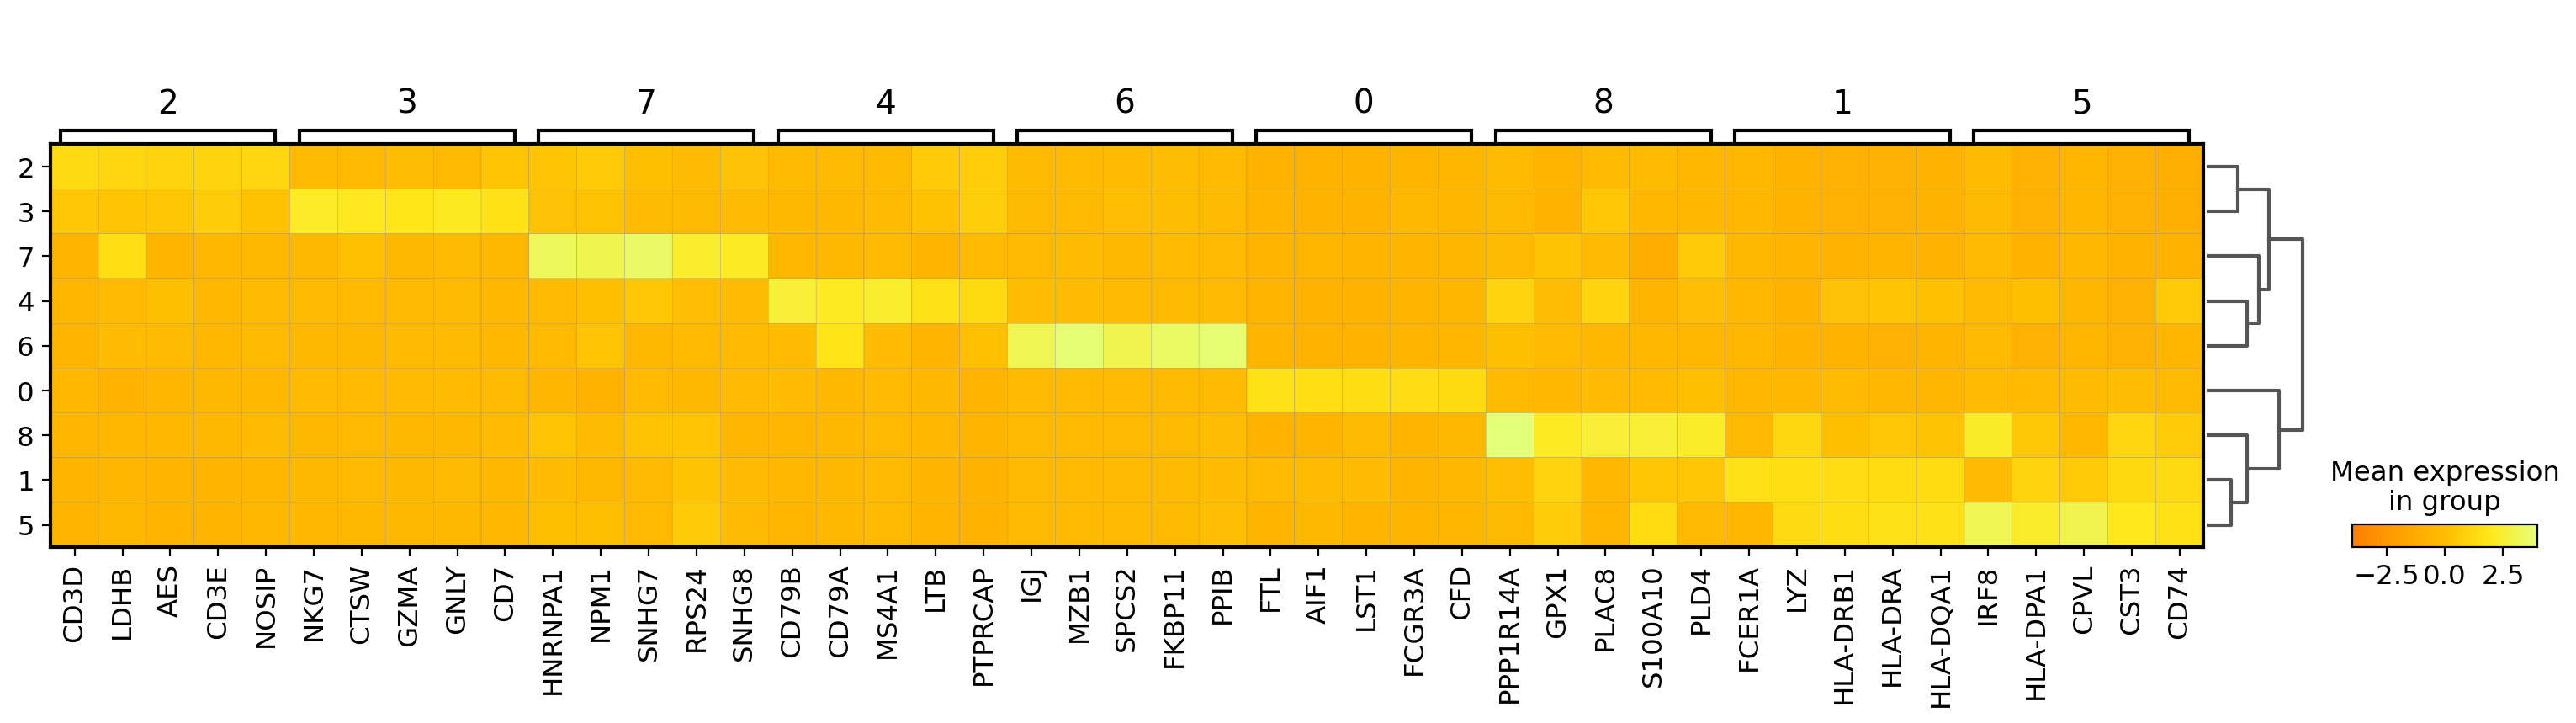

In [44]:
sc.pl.rank_genes_groups_matrixplot(pbmc, n_genes=5, use_raw=False, vmin=-4, vmax=4, cmap='Wistia_r', layer='scaled')

**You can use  heatmap for visualization Marker genes**

{'dendrogram_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fca5b628c50>,
 'gene_groups_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fca5c665630>,
 'groupby_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fca5ce50c50>,
 'heatmap_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fca5b9038d0>}

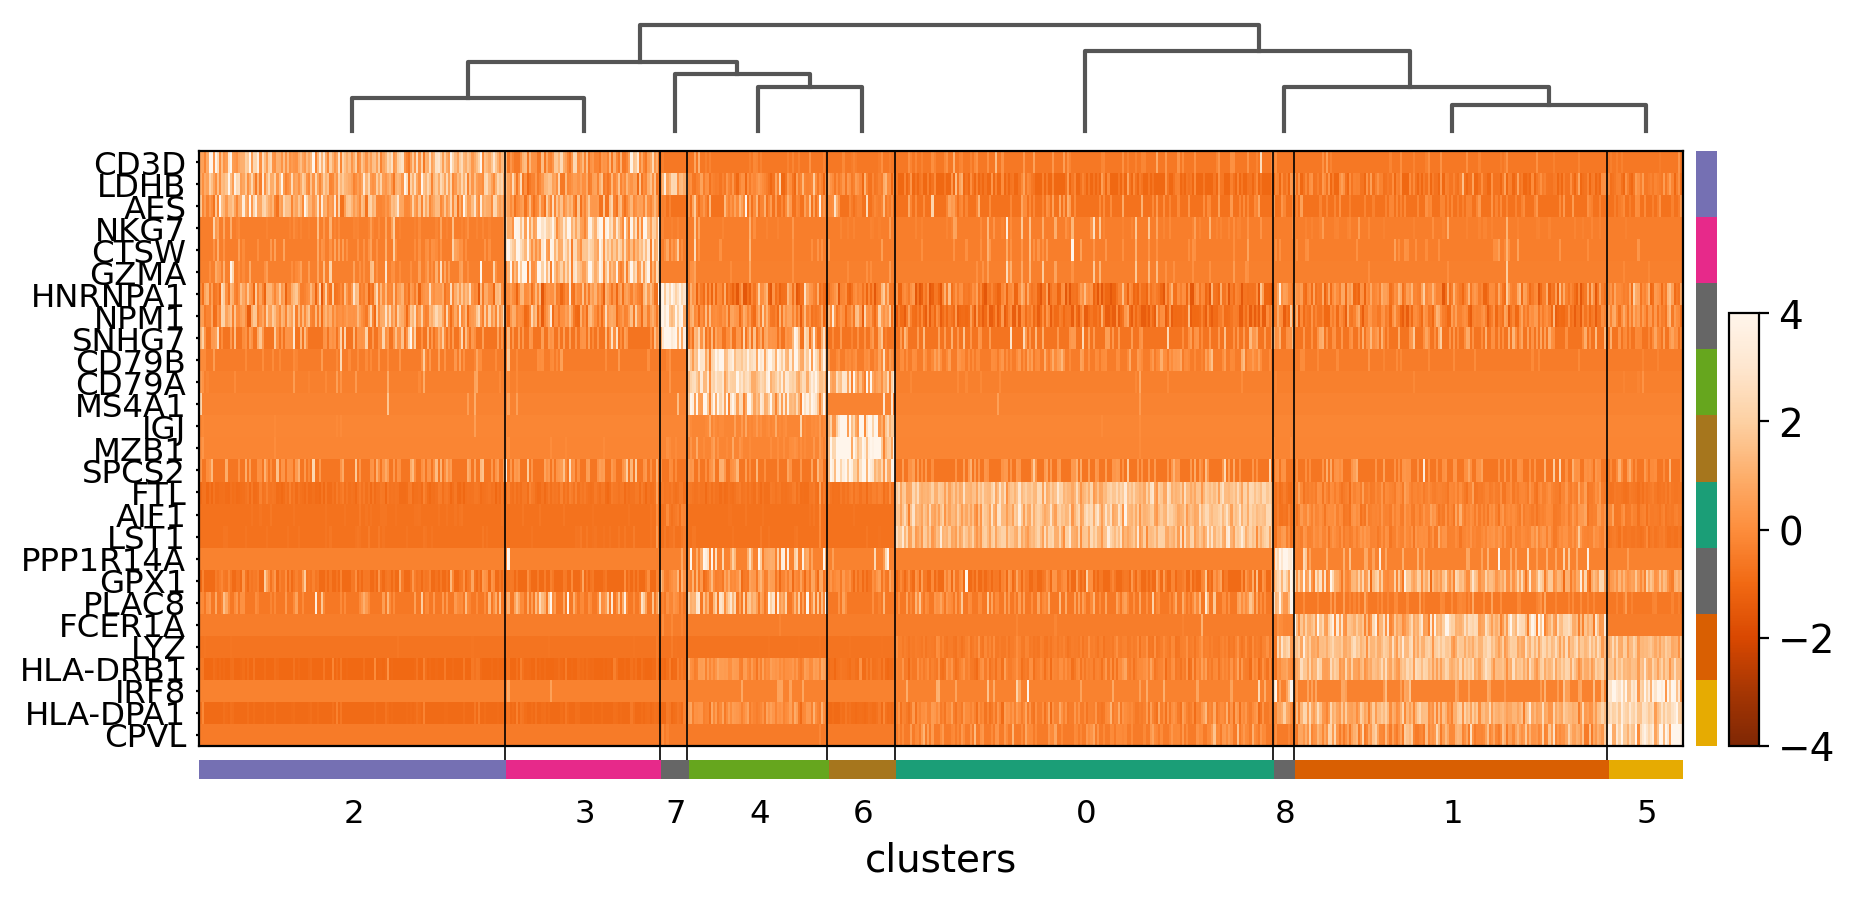

In [48]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, use_raw=False, swap_axes=True, vmin=-4, vmax=4, cmap='Oranges_r', layer='scaled', figsize=(10,5), show=False)

**You can usetracksplot for visualization Marker genes**

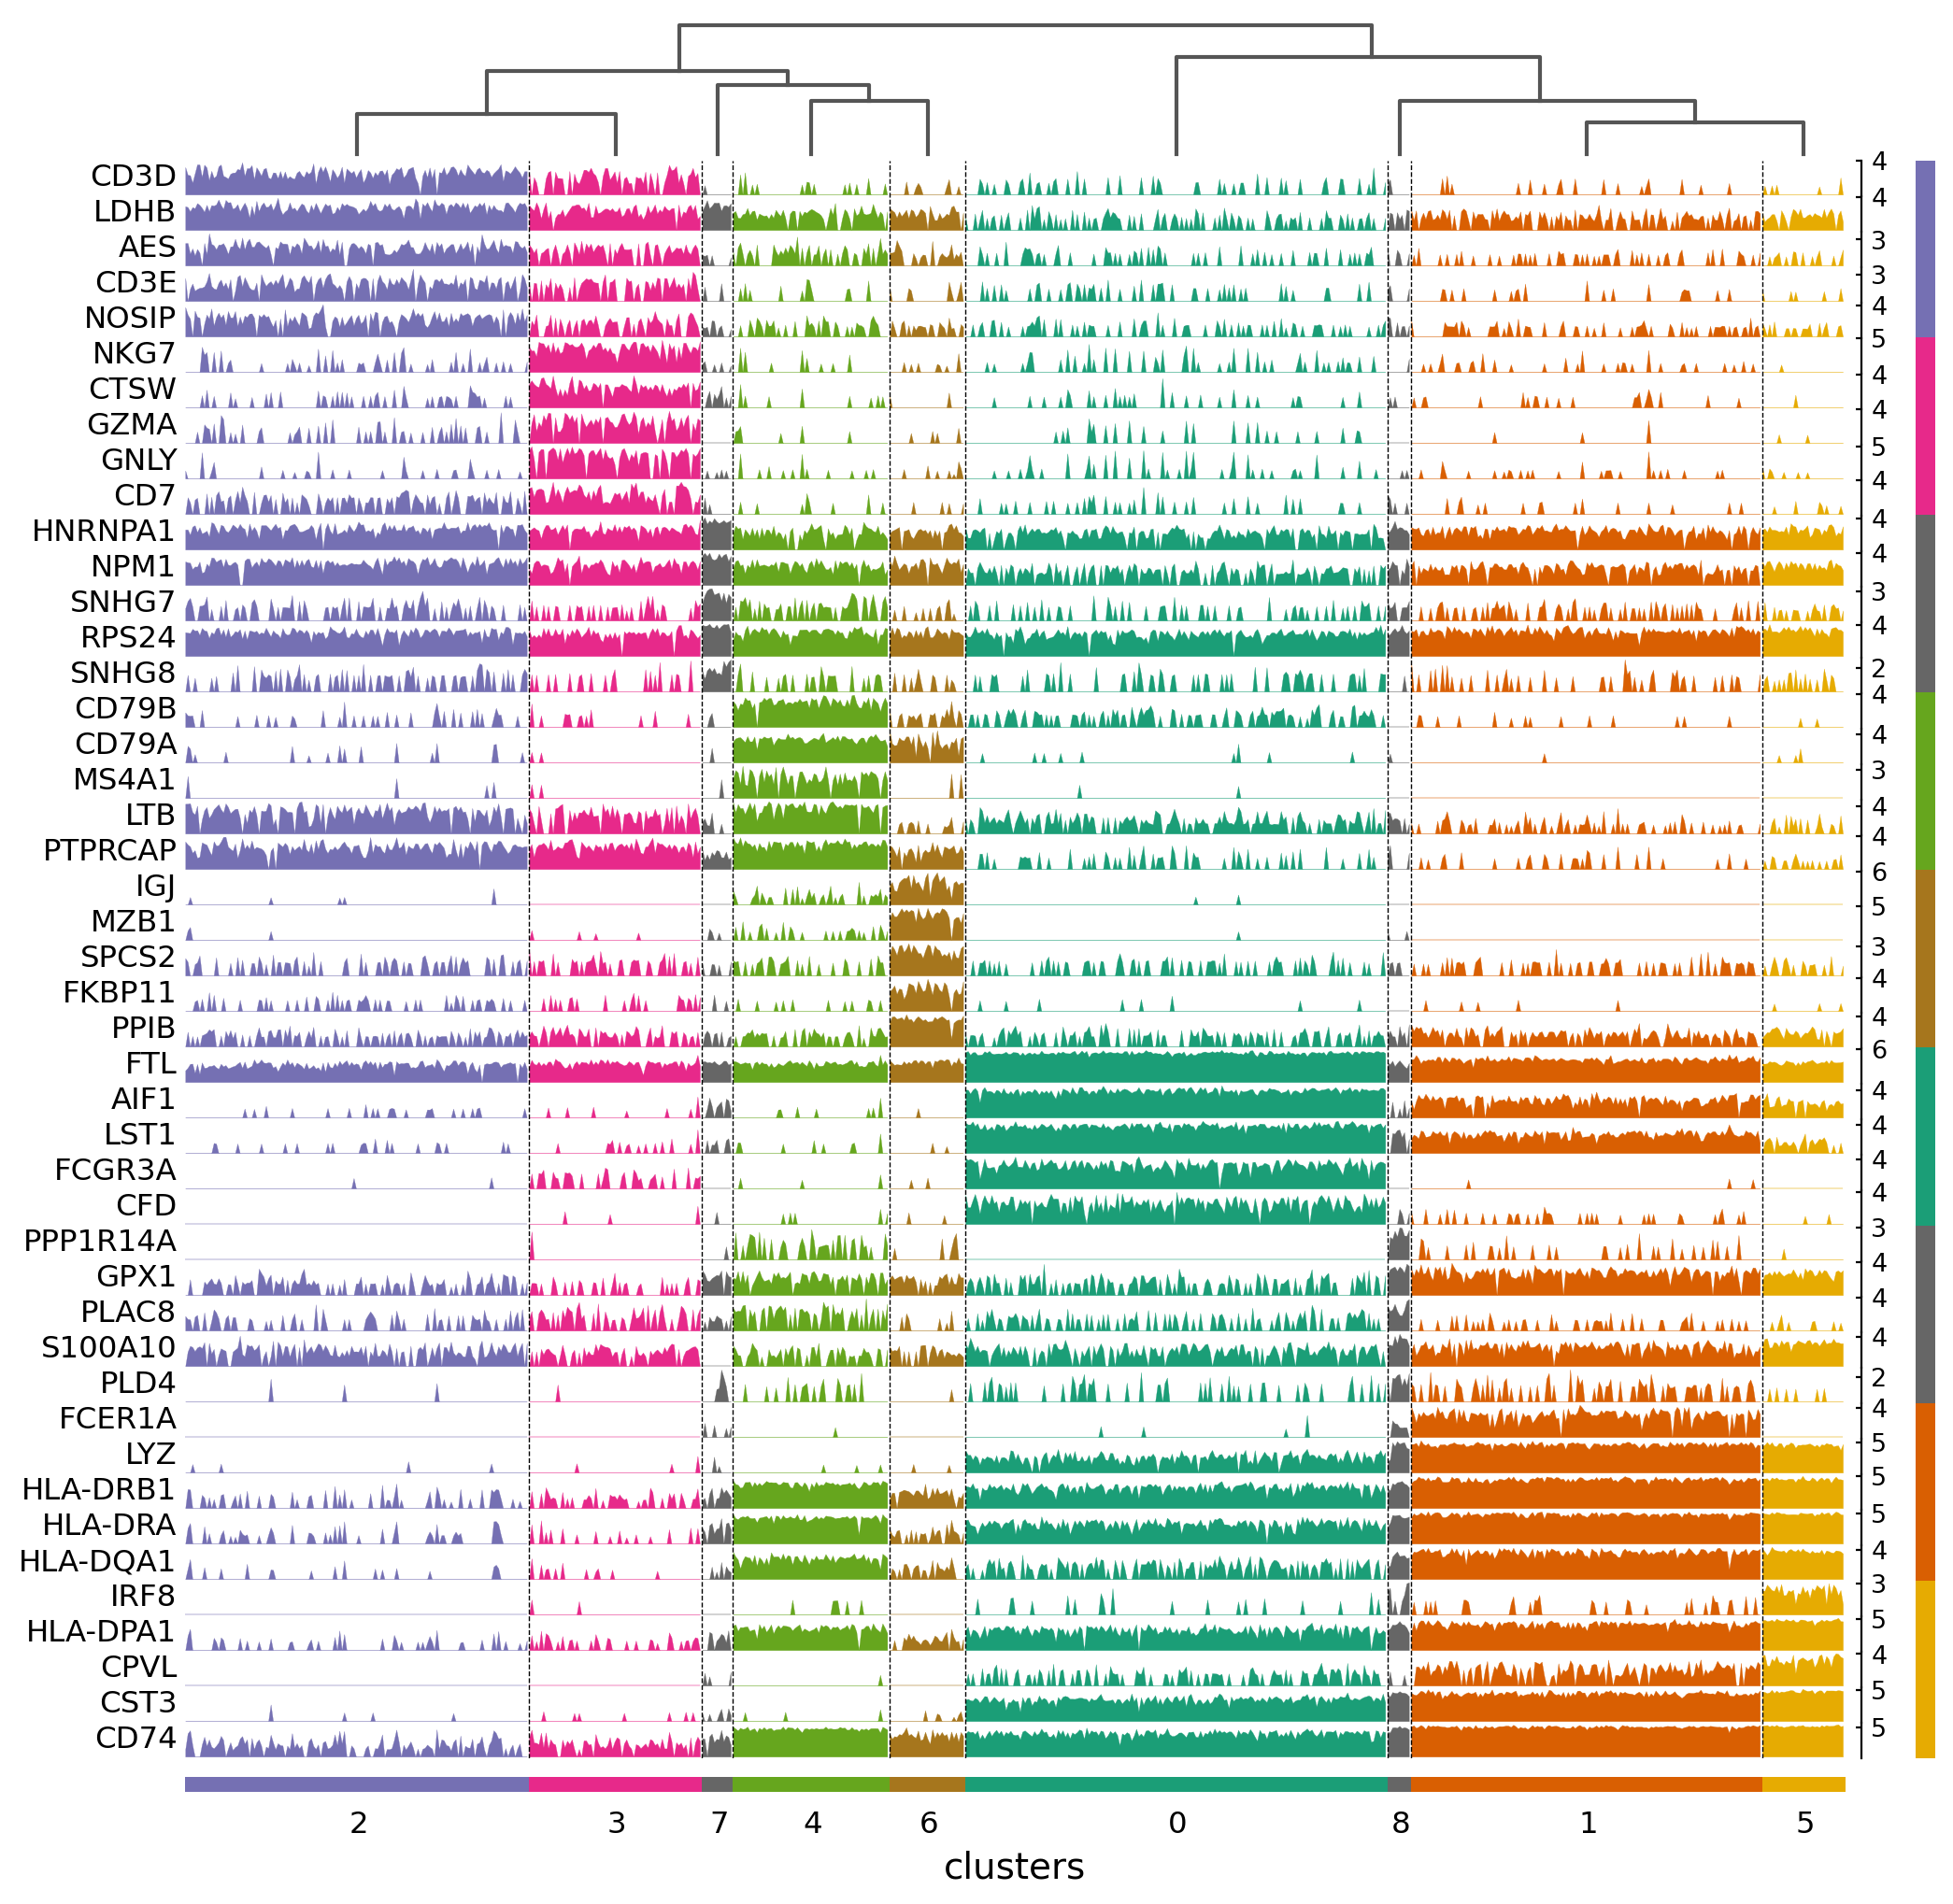

In [49]:
sc.pl.rank_genes_groups_tracksplot(pbmc, n_genes=5)

**Split violin plots can help to compare marker genes**

*   Compare marker genes for all groups at once under split violin plots .



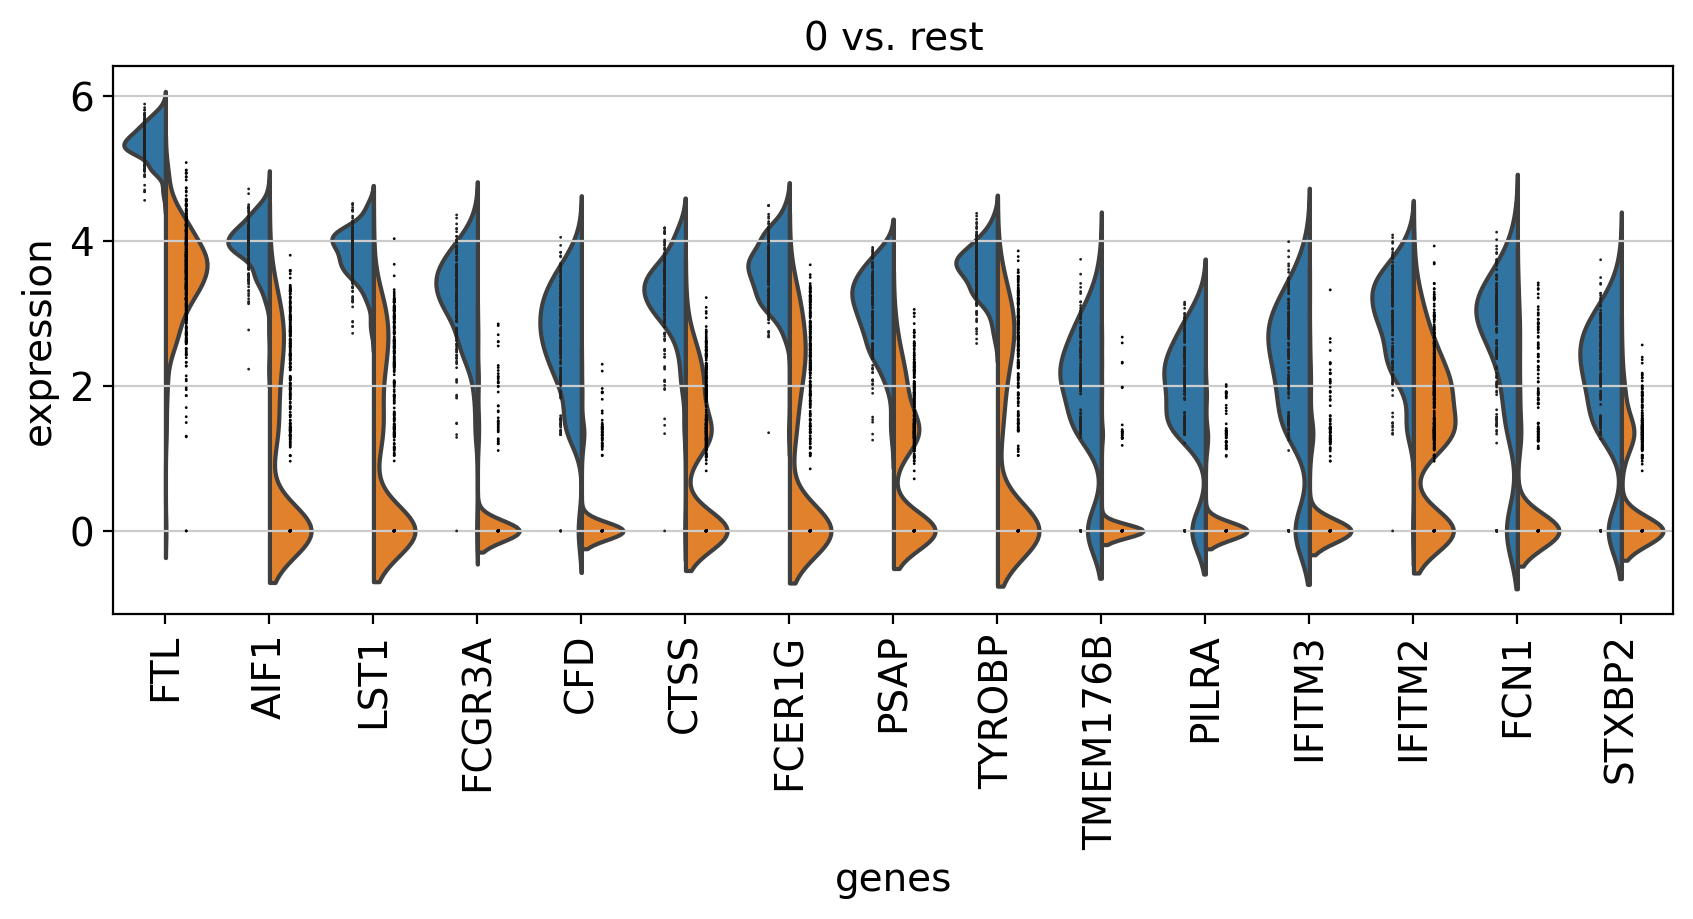

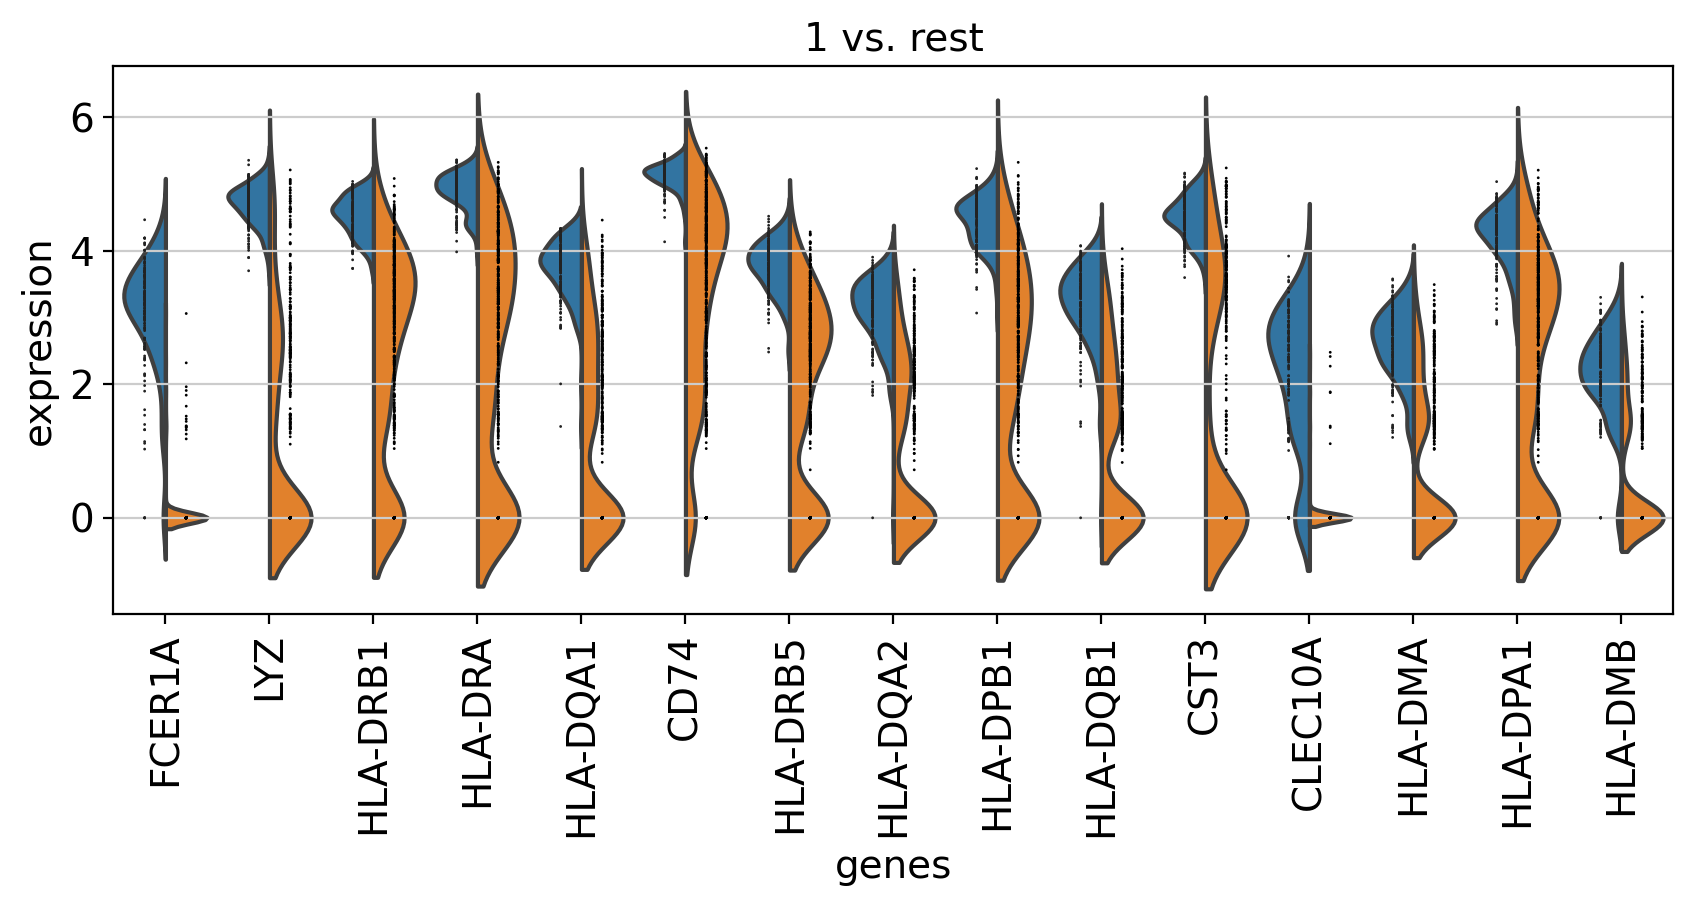

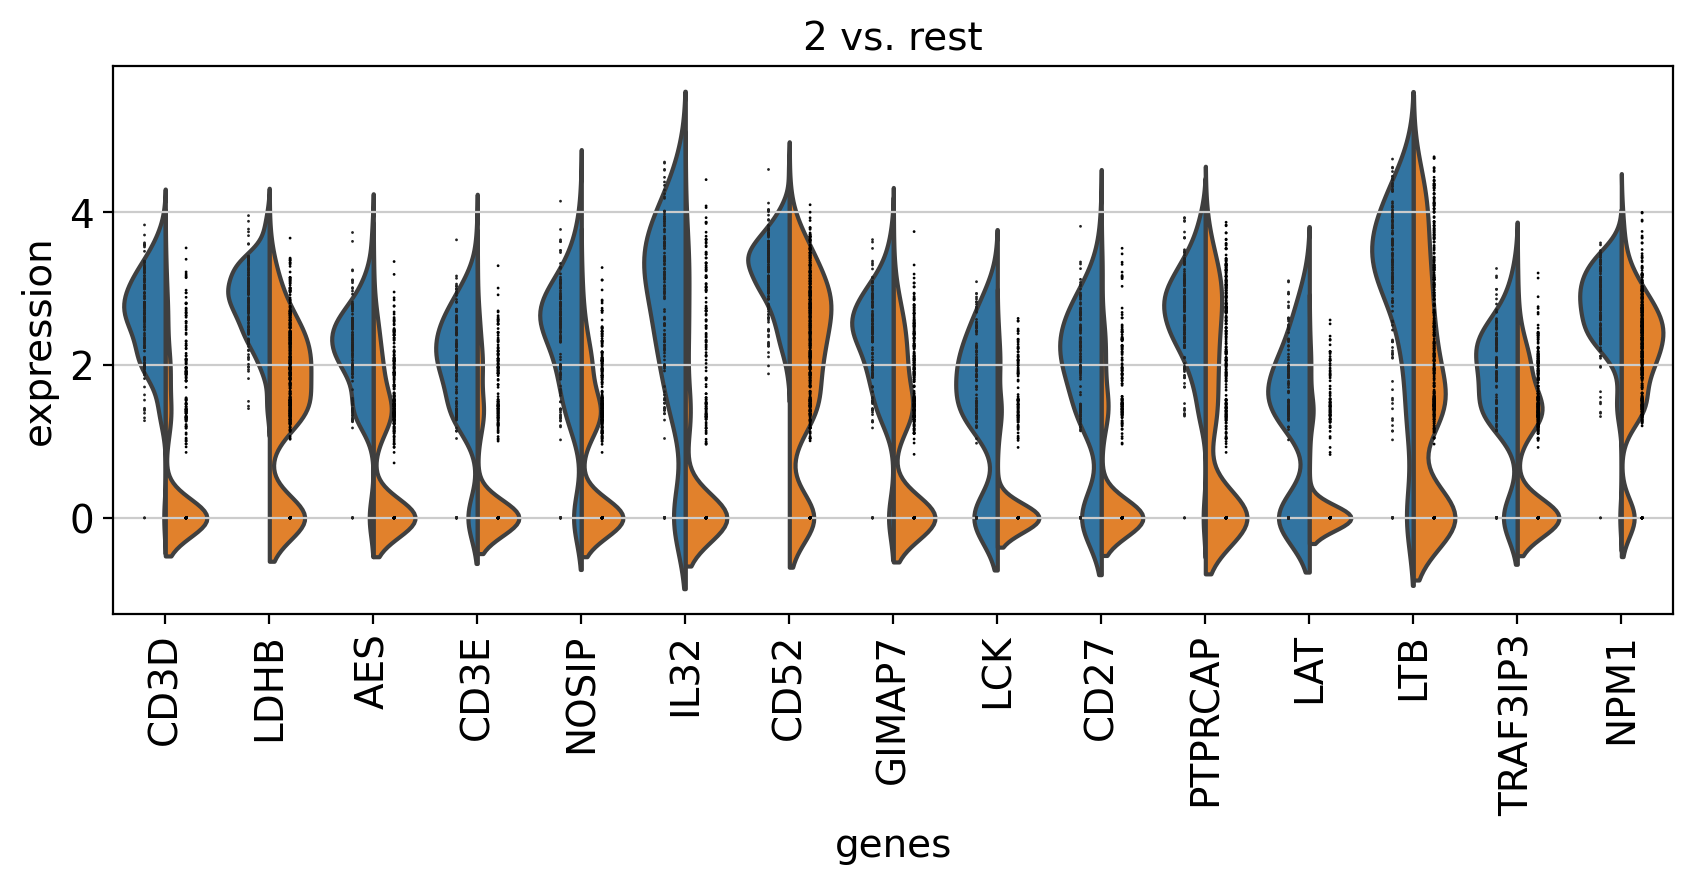

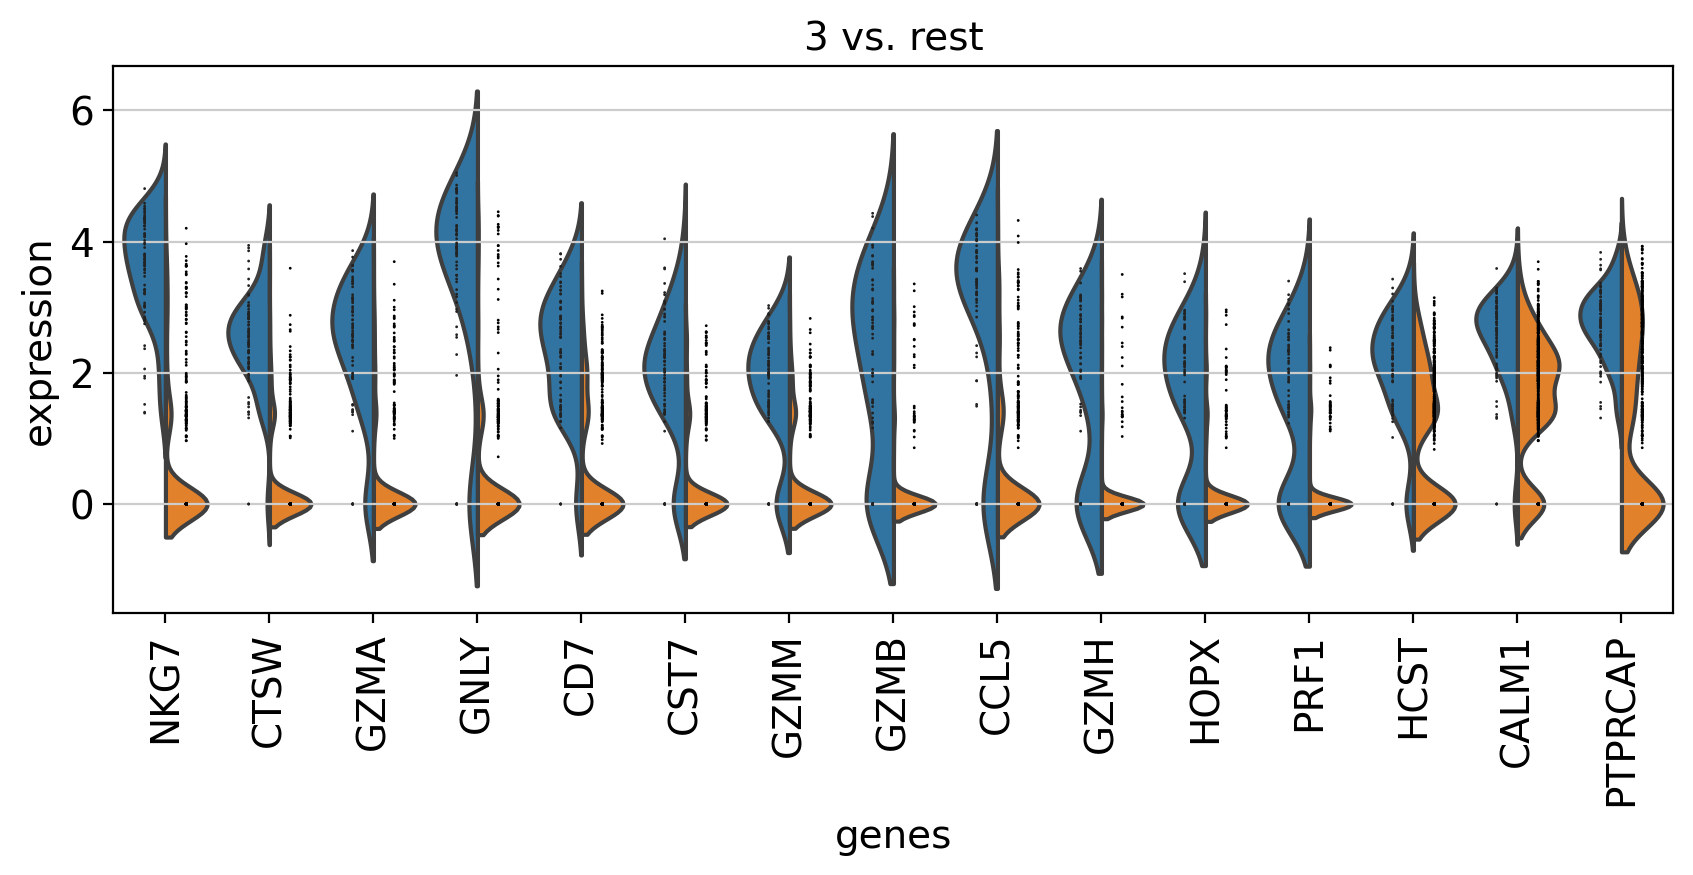

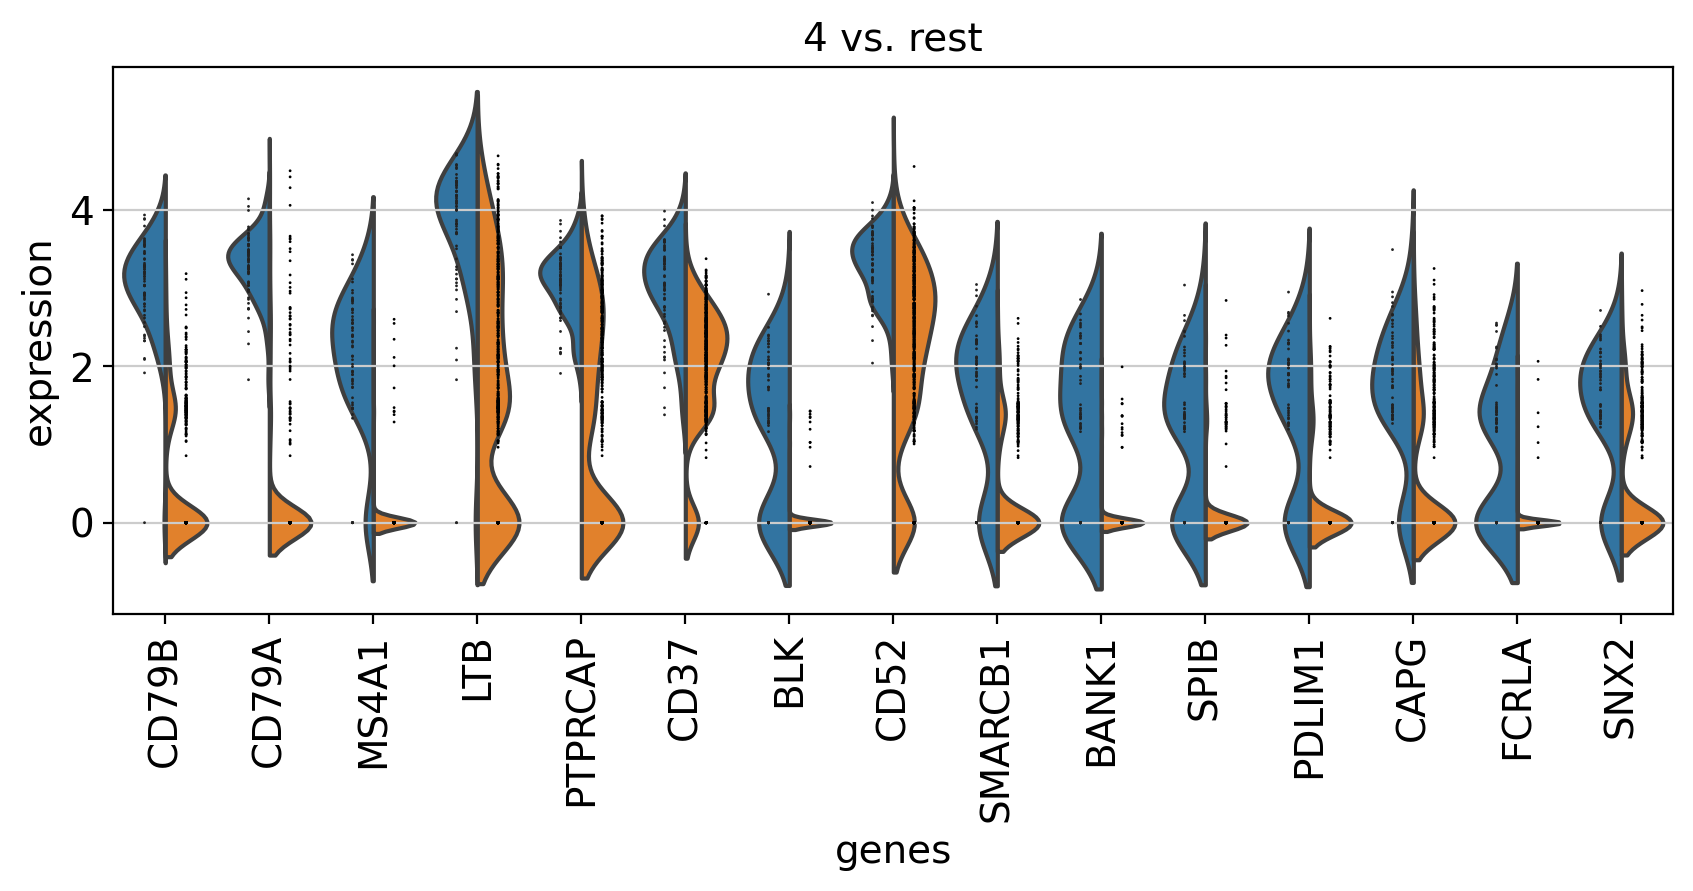

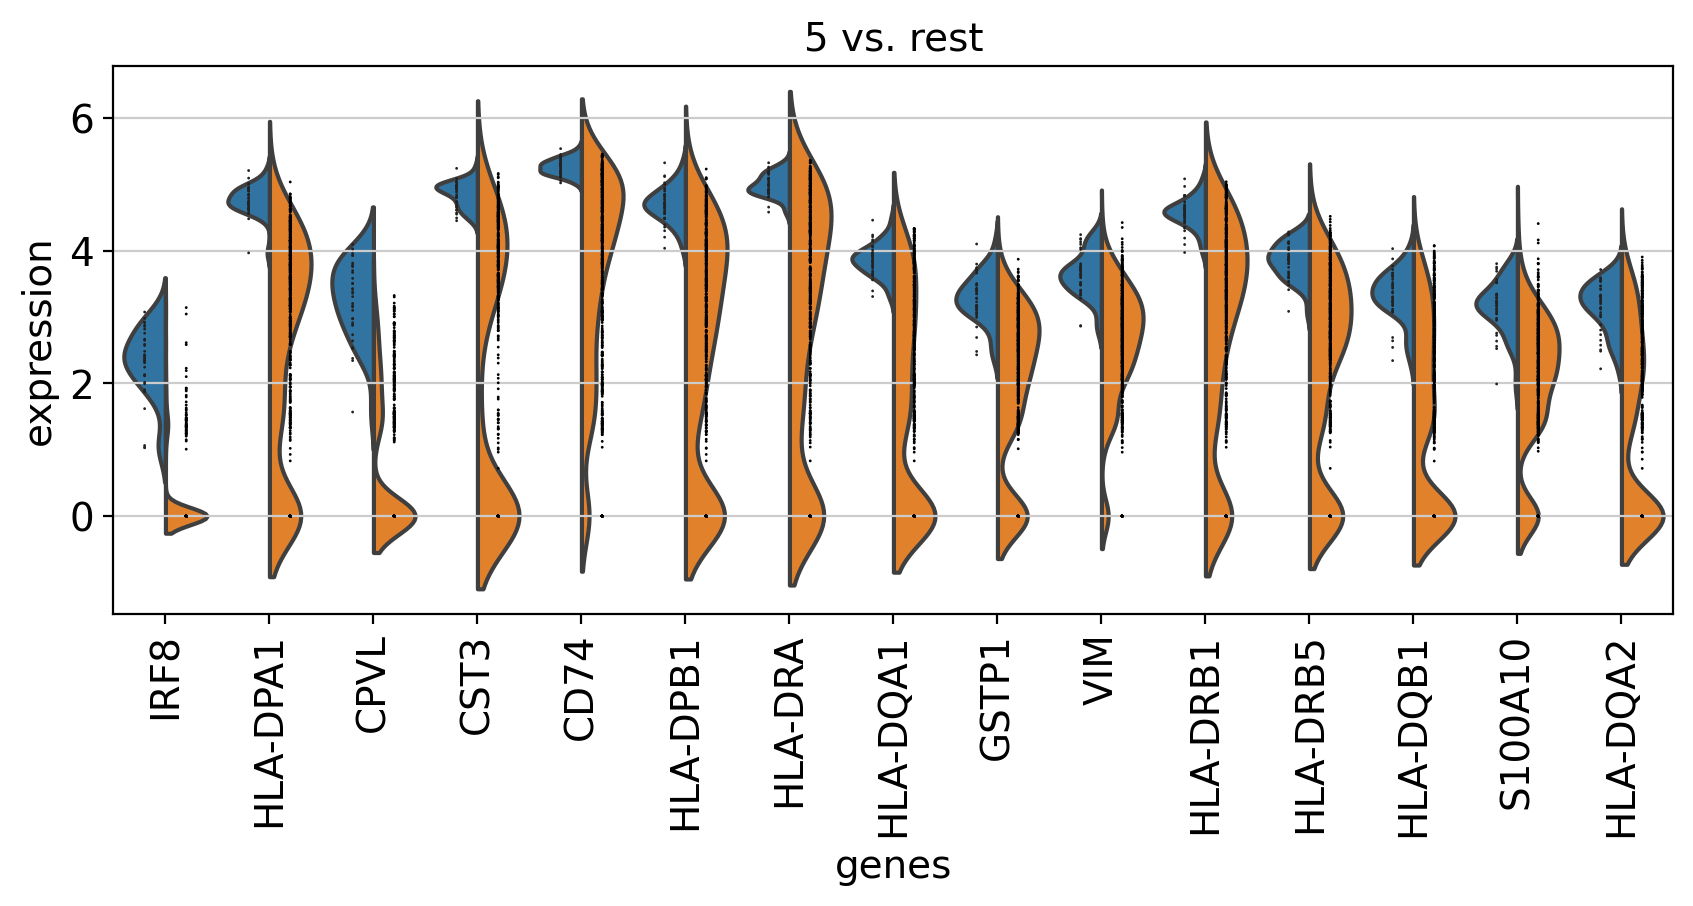

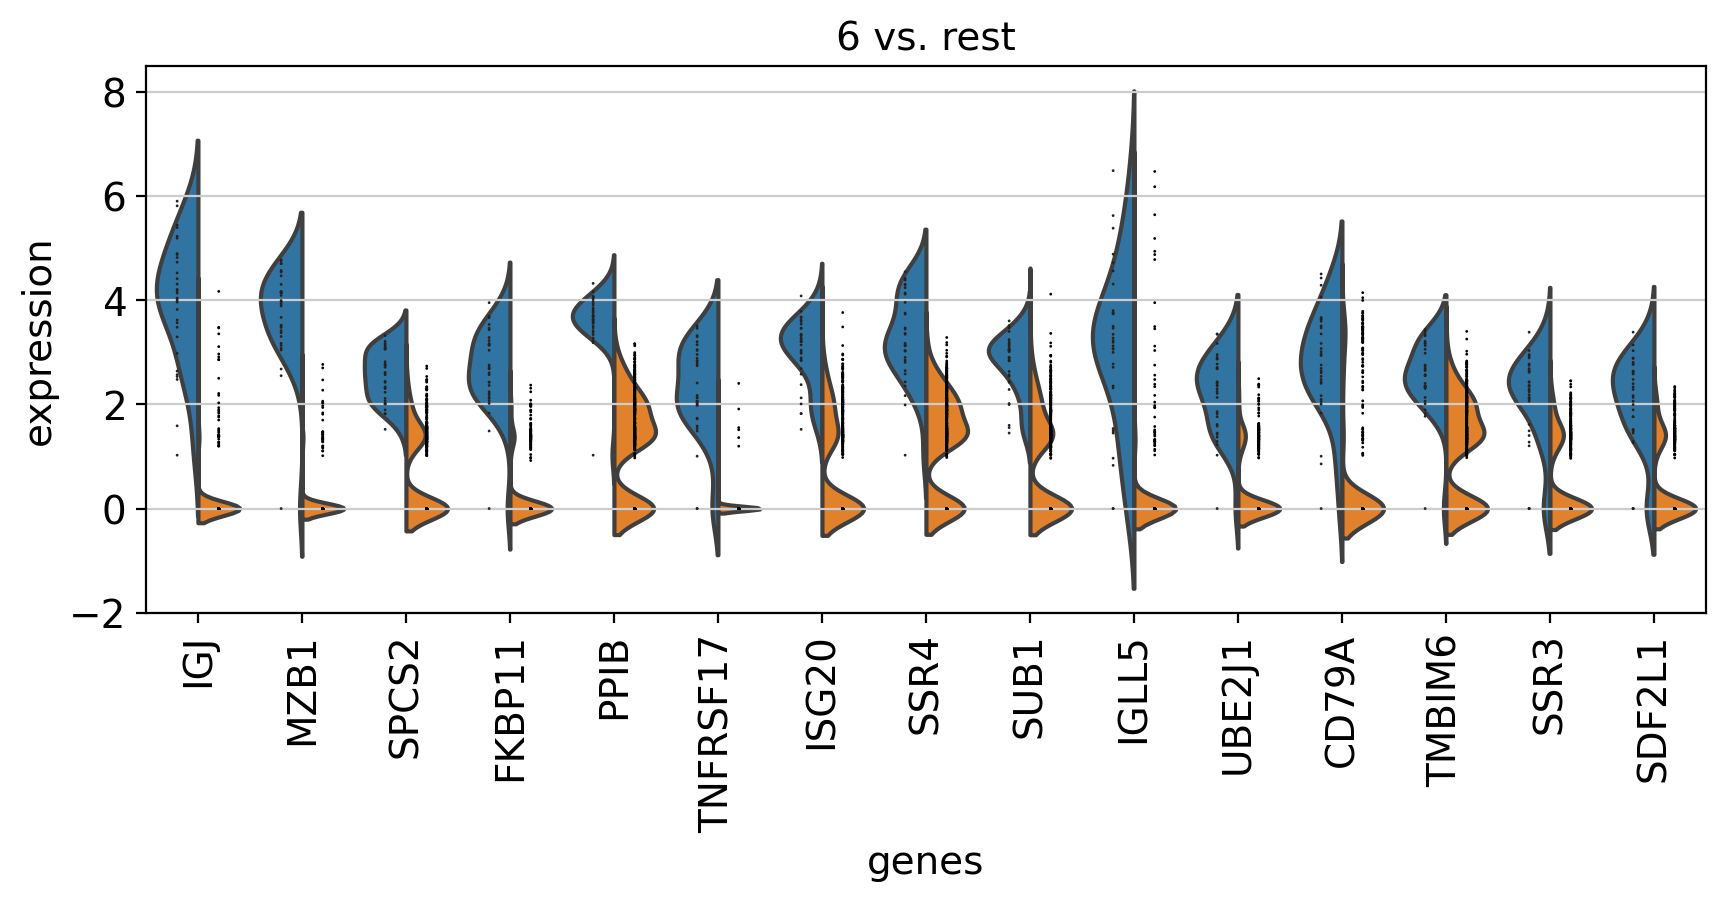

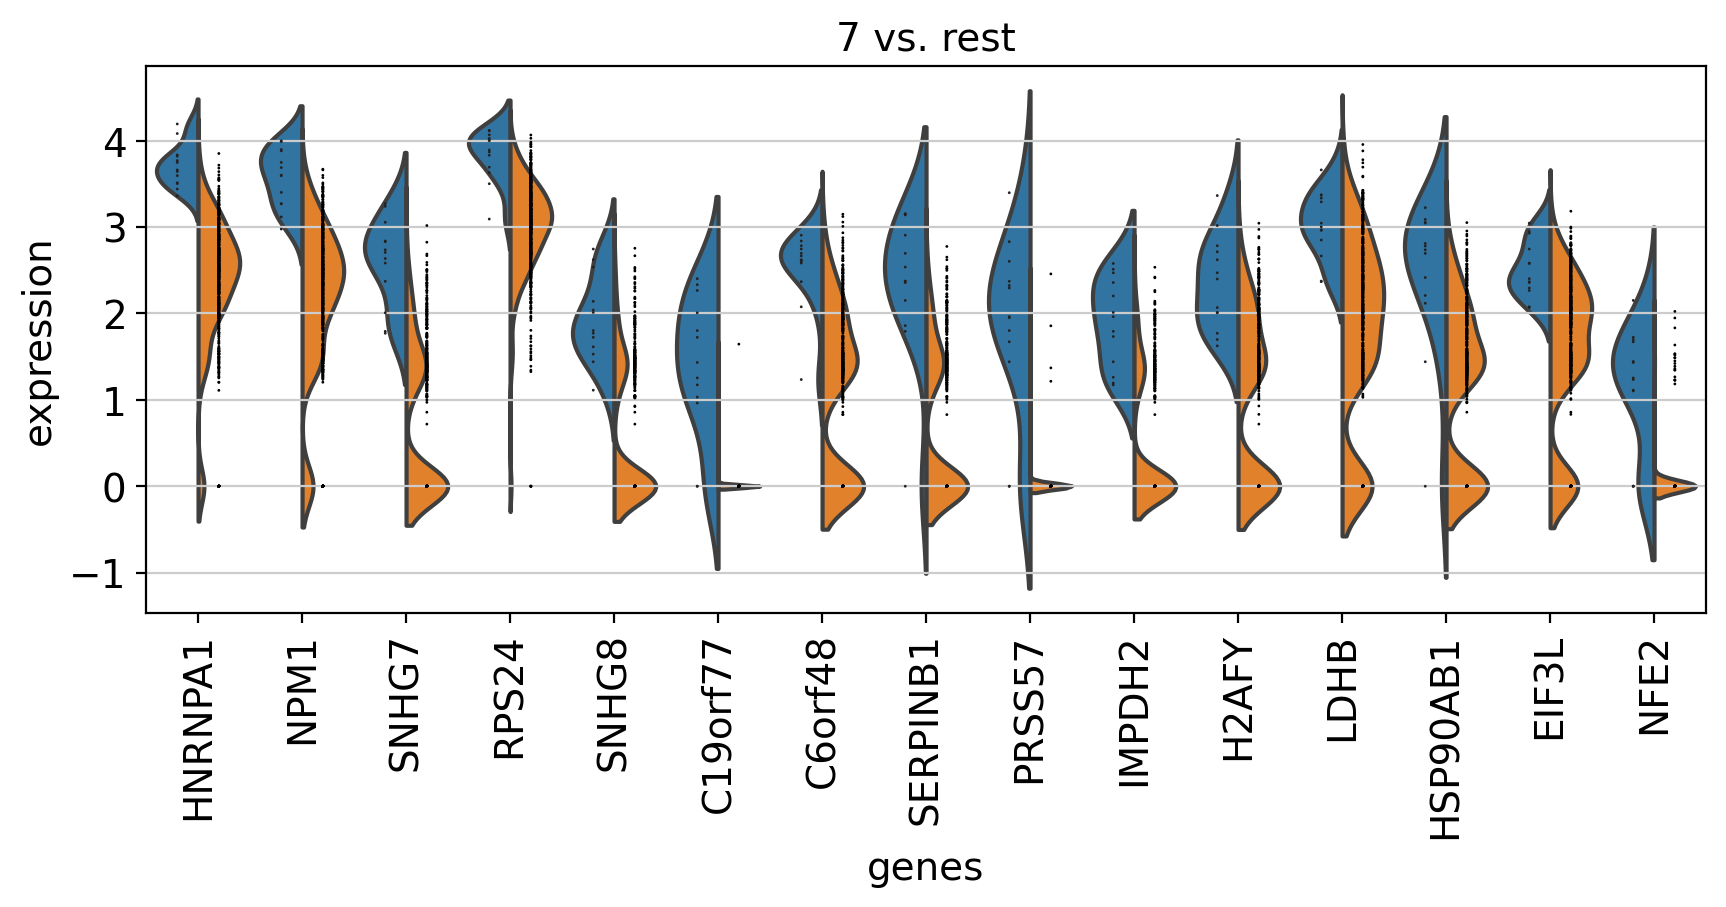

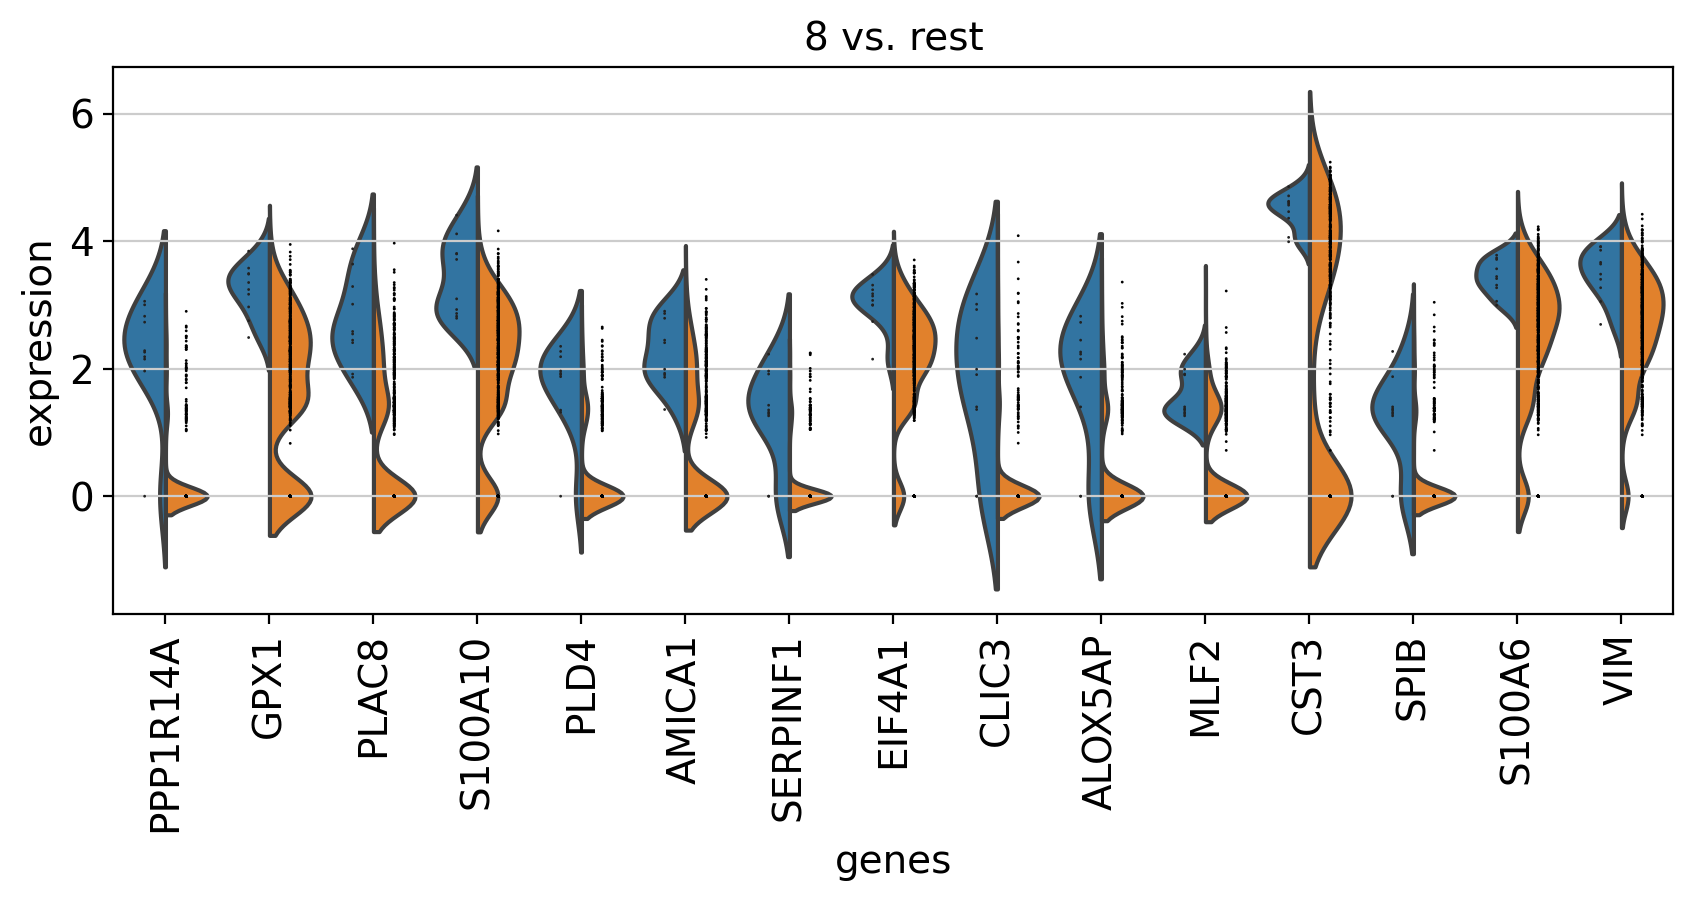

In [51]:
rcParams['figure.figsize'] = 10,3.6
sc.pl.rank_genes_groups_violin(pbmc, n_genes=15, jitter=False)

**Dendrogram**

*   A dendrogram is a diagram representing a tree
*   Arrange the categories and plotted independently 



In [52]:
# compute hierachical clustering based using PCAs 
sc.tl.dendrogram(pbmc, 'bulk_labels')

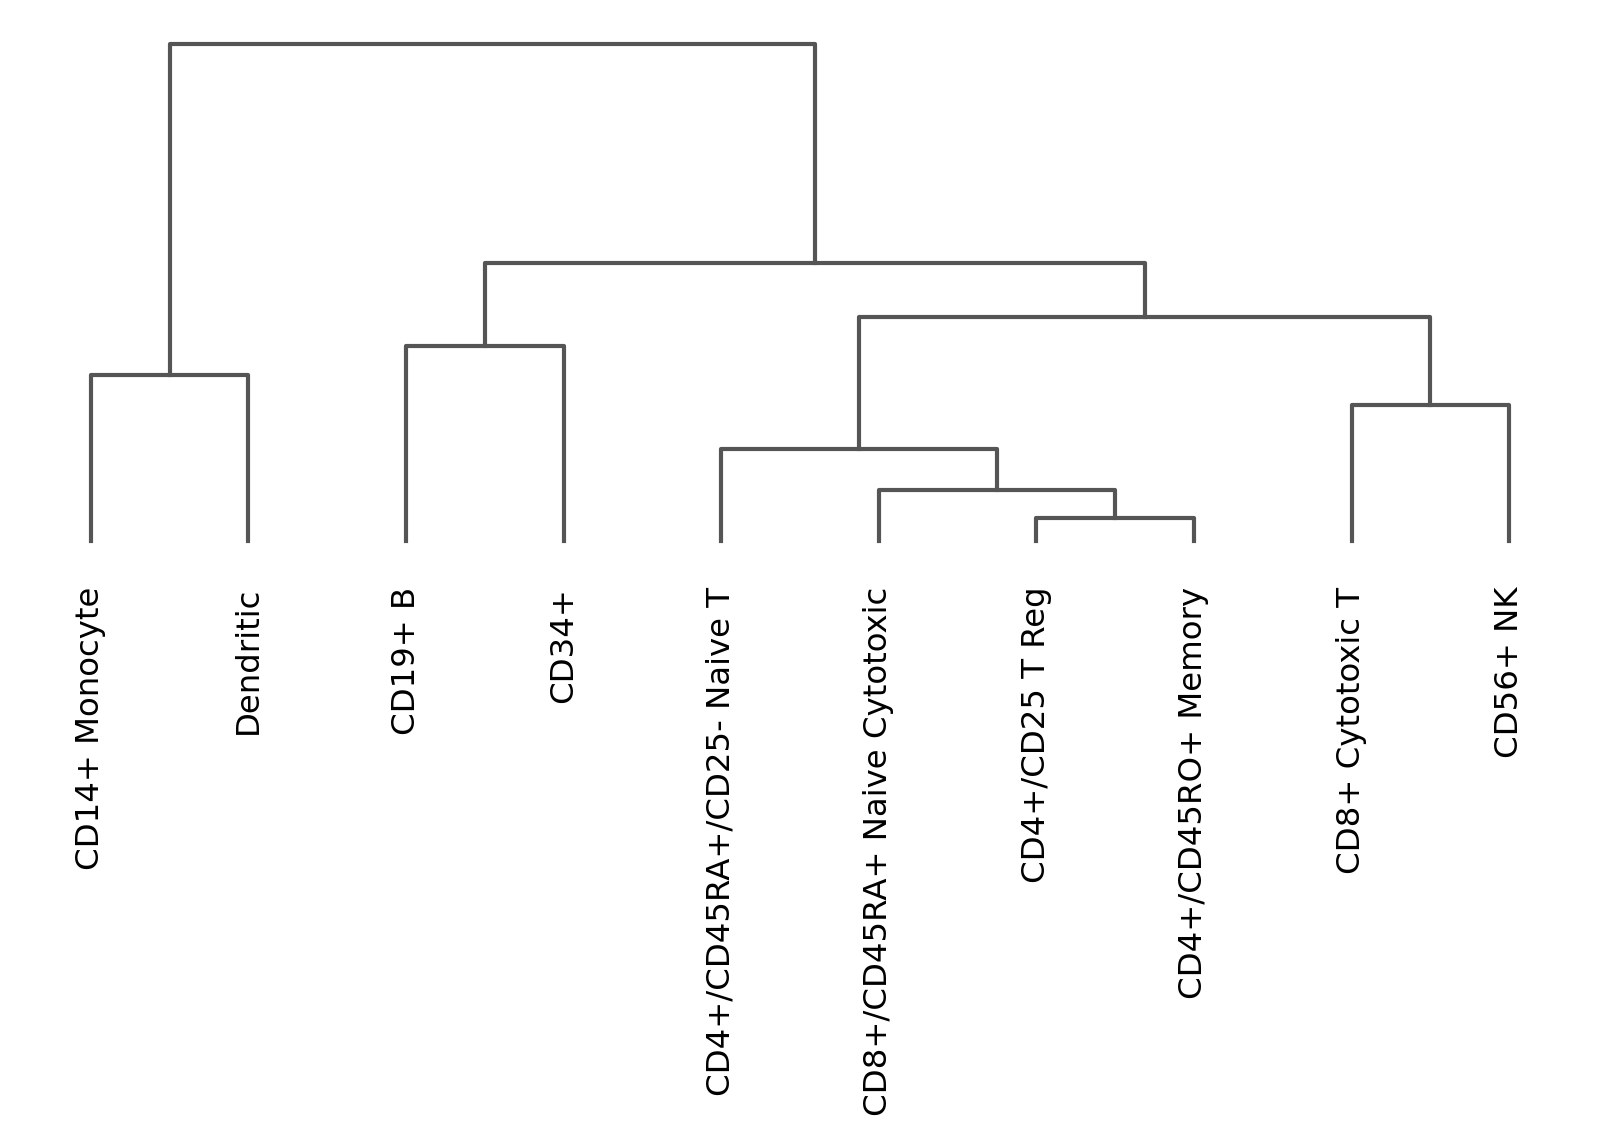

In [53]:
ax = sc.pl.dendrogram(pbmc, 'bulk_labels')


**Dendrogram and correlation** by default ‘pearson’

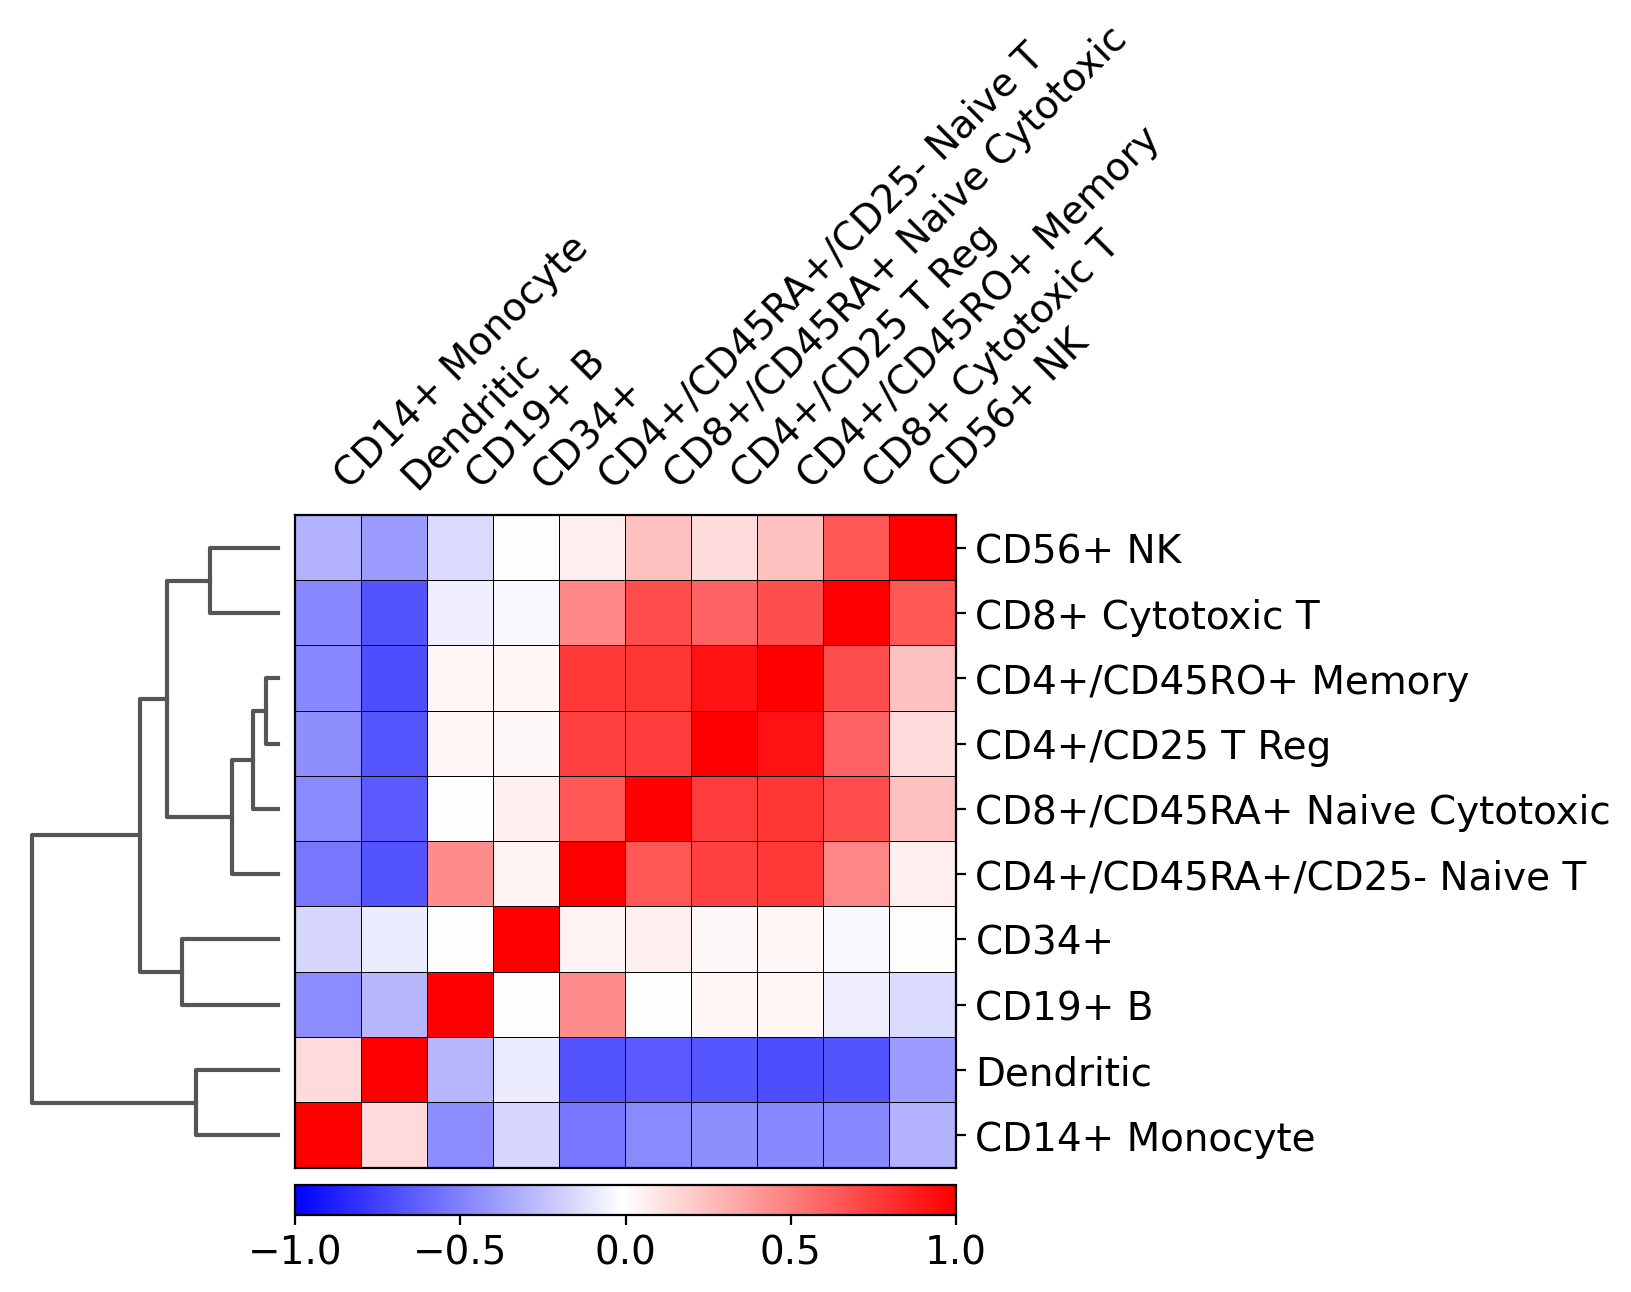

In [55]:
ax = sc.pl.correlation_matrix(pbmc, 'bulk_labels', figsize=(6,4.6))